# 1. Introducción

Valencian Telecommunications, SA (VALTEL) es una compañía prestadora de servicios de telecomunicaciones que se ha especializado en ciudadanos no nacionales residentes en España. Su propuesta de valor es ofrecer packs económicos focalizados en las llamadas internacionales y la itinerancia de datos (roaming) y tarifas flexibles de datos.

En su plan estratégico, se contempla la diversificación de servicios y se plantea el diseño de nuevas áreas de la compañía dedicadas a comercializar a través de internet bienes de interés para el colectivo de ciudadanos no nacionales. Por medio de encuestas a sus clientes, se ha detectado que la compra de vehículos para ciudadanos no nacionales puede ser un potencial nicho, y, concretamente, el mercado de coches de segunda mano.

VALTEL desea ofertar dentro de su app móvil un servicio que permita a sus clientes buscar vehículos en venta y ofrecerles un precio competitivo. Para conocer dicho precio, el área de I+D ha conseguido un dataset (Coches_Segunda_Mano.csv) con las ventas de vehículos de segunda mano y encarga al área de Ciencia de Datos la estimación del precio de cada vehículo para poder elaborar una tarifa competitiva.

Por tanto, el trabajo para realizar será el siguiente:

1) Utilizar la metodología CRISP-DM para estimar el precio de un vehículo (campo Precio). Se recomienda utilizar como base el cuaderno del caso de repaso o bien BigML.

2) Realizar una narrativa que comunique los hallazgos. Por simplicidad, se recomienda utilizar PowerPoint o equivalente para realizar la narrativa.

## 1.1. Configuración del entorno

In [2]:
import pandas
import numpy 

import seaborn
import matplotlib.pyplot as pyplot

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from pathlib import Path
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

pandas.options.display.float_format = "{:.2f}".format
seaborn.set(color_codes=True)
seaborn.set_theme(style="white")
rng = numpy.random.default_rng(47)

## 1.2. Metodología

Se va a emplear la metodología CRISP-DM para abordar este proyecto, recorriendo cada una de sus fases:

<img src="imagen.png">

# 2. Entendimiento del negocio

Como se expone en el enunciado, lo que se pretende es estimar el **precio de un vehículo (campo Precio)** del dataset 'Coches_Segunda_Mano.csv'.

# 3. Entendimiento de los datos

Para comenzar el entendimiento de los datos, leemos el fichero "Coches_Segunda_Mano.csv".

In [3]:
dataFrame = pandas.read_csv('Coches_Segunda_Mano.csv', sep=';')

## 3.1. Descripción general de los datos

Procedemos a realizar una exploración general de los datos.

In [4]:
print(f"Tamaño del fichero: {Path('Coches_Segunda_Mano.csv').stat().st_size} bytes")

Tamaño del fichero: 1611536 bytes


In [5]:
print('Número total de filas:', dataFrame.shape[0])
print()
print('Número total de columnas:', dataFrame.shape[1])

Número total de filas: 11914

Número total de columnas: 16


In [6]:
print('Primeras 5 líneas del dataframe:')
dataFrame.head()

Primeras 5 líneas del dataframe:


,Marca,Modelo,Año,Combustible,CV,Cilindros,Transmisión,Tracción,Puertas,Mercado,Tamaño,Estilo,Consumo Carretera,Consumo Ciudad,Popularidad,Precio
0,BMW,1 Series M,2011,premium unleaded (required),335.00,6.00,MANUAL,rear wheel drive,2.00,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26.00,19.00,3916,46135.00
1,BMW,1 Series,2011,premium unleaded (required),300.00,6.00,MANUAL,rear wheel drive,2.00,"Luxury,Performance",Compact,Convertible,28.00,19.00,3916,40650.00
2,BMW,1 Series,2011,premium unleaded (required),300.00,6.00,MANUAL,rear wheel drive,2.00,"Luxury,High-Performance",Compact,Coupe,28.00,20.00,3916,36350.00
3,BMW,1 Series,2011,premium unleaded (required),230.00,6.00,MANUAL,rear wheel drive,2.00,"Luxury,Performance",Compact,Coupe,28.00,18.00,3916,29450.00
4,BMW,1 Series,2011,premium unleaded (required),230.00,6.00,MANUAL,rear wheel drive,2.00,Luxury,Compact,Convertible,28.00,18.00,3916,34500.00


In [7]:
print('Últimas 5 líneas del dataframe:')
dataFrame.tail()

Últimas 5 líneas del dataframe:


,Marca,Modelo,Año,Combustible,CV,Cilindros,Transmisión,Tracción,Puertas,Mercado,Tamaño,Estilo,Consumo Carretera,Consumo Ciudad,Popularidad,Precio
11909,Acura,ZDX,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23.00,16.00,204,46120.00
11910,Acura,ZDX,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23.00,16.00,204,56670.00
11911,Acura,ZDX,2012,premium unleaded (required),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23.00,16.00,204,50620.00
11912,Acura,ZDX,2013,premium unleaded (recommended),300.00,6.00,AUTOMATIC,all wheel drive,4.00,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23.00,16.00,204,50920.00
11913,Lincoln,Zephyr,2006,regular unleaded,221.00,6.00,AUTOMATIC,front wheel drive,4.00,Luxury,Midsize,Sedan,26.00,17.00,61,28995.00


In [8]:
print('Tipo de datos de cada variable:')
dataFrame.dtypes

Tipo de datos de cada variable:


Marca                 object
Modelo                object
Año                    int64
Combustible           object
CV                   float64
Cilindros            float64
Transmisión           object
Tracción              object
Puertas              float64
Mercado               object
Tamaño                object
Estilo                object
Consumo Carretera    float64
Consumo Ciudad       float64
Popularidad            int64
Precio               float64
dtype: object

La variable 'Puertas' se interpreta como variable cuantitativa continua, en vez de discreta. Para forzar su cambio, anticipamos posibles errores de calidad del dato, como son los valores nulos.

In [9]:
print("* CANTIDAD de datos nulos por columna en el dataframe")
print(dataFrame.isnull().sum())
print("-------------------------------------------------------")
print("* PORCENTAJE de datos nulos por columna en el dataframe")
print(dataFrame.isnull().sum()/len(dataFrame)*100)

* CANTIDAD de datos nulos por columna en el dataframe
Marca                   0
Modelo                  0
Año                     0
Combustible             3
CV                     69
Cilindros              30
Transmisión             0
Tracción                0
Puertas                 6
Mercado              3742
Tamaño                  0
Estilo                  0
Consumo Carretera       0
Consumo Ciudad          0
Popularidad             0
Precio                  0
dtype: int64
-------------------------------------------------------
* PORCENTAJE de datos nulos por columna en el dataframe
Marca                0.00
Modelo               0.00
Año                  0.00
Combustible          0.03
CV                   0.58
Cilindros            0.25
Transmisión          0.00
Tracción             0.00
Puertas              0.05
Mercado             31.41
Tamaño               0.00
Estilo               0.00
Consumo Carretera    0.00
Consumo Ciudad       0.00
Popularidad          0.00
Precio         

Ahora eliminamos los valores nulos detectados y formateamos el tipo de dato de la variable 'Puertas':

In [10]:
dataFrame = dataFrame.dropna()

print('Eliminación de datos nulos: Ok')
print()

dataFrame = dataFrame.astype({'Puertas': int})

print('Tipo de datos de cada variable:')
dataFrame.dtypes

Eliminación de datos nulos: Ok

Tipo de datos de cada variable:


Marca                 object
Modelo                object
Año                    int64
Combustible           object
CV                   float64
Cilindros            float64
Transmisión           object
Tracción              object
Puertas                int64
Mercado               object
Tamaño                object
Estilo                object
Consumo Carretera    float64
Consumo Ciudad       float64
Popularidad            int64
Precio               float64
dtype: object

Comprobamos los valores de la variable 'Puertas'.

In [11]:
print(dataFrame['Puertas'].unique())

[2 4 3]


## 3.2. Análisis univariante

Para comenzar el análisis univariante, creamos dos dataframe separados con las variables cualitativas y las cuantitativas, preparando los estadísticos básicos de cada una.

In [12]:
def analyze_dataFrame(dataFrame):
    data_types = dict(dataFrame.dtypes)
    numeric_columns = []
    categoric_columns = []
    
    for value,types in data_types.items():
        if types == numpy.float64:
            numeric_columns.append([value, 'Cuantitativa continua', dataFrame[value].mean(), dataFrame[value].min(), dataFrame[value].max(), dataFrame[value].median()])
        elif types == numpy.int64 or pandas.Int64Dtype.is_dtype(types):
            numeric_columns.append([value, 'Cuantitativa discreta', dataFrame[value].mean(), dataFrame[value].min(), dataFrame[value].max(), dataFrame[value].median()])
        else:
            categoric_columns.append([value, f'Cualitativa', dataFrame[value].nunique()])
    numeric = pandas.DataFrame(numeric_columns, columns=['Nombre', 'Tipo de variable', 'Media', 'Mínimo', 'Máximo', 'Mediana'])
    categoric = pandas.DataFrame(categoric_columns, columns=['Nombre', 'Tipo de variable', 'Número de clases'])
    return numeric, categoric

numeric_types, categoric_types = analyze_dataFrame(dataFrame)

print('Finalizado Ok')

Finalizado Ok


### 3.2.1. Variables cualitativas

Comprobamos las columnas con datos cualitativos, junto con el número de clases de cada una de ellas.

In [13]:
print(categoric_types.to_string(index=False))

     Nombre Tipo de variable  Número de clases
      Marca      Cualitativa                47
     Modelo      Cualitativa               713
Combustible      Cualitativa                 8
Transmisión      Cualitativa                 5
   Tracción      Cualitativa                 4
    Mercado      Cualitativa                70
     Tamaño      Cualitativa                 3
     Estilo      Cualitativa                16


Visualizamos las variables cualitativas para conocer su distribución de valores, excepto la variable 'Modelo' por su amplitud de clases.

Marca


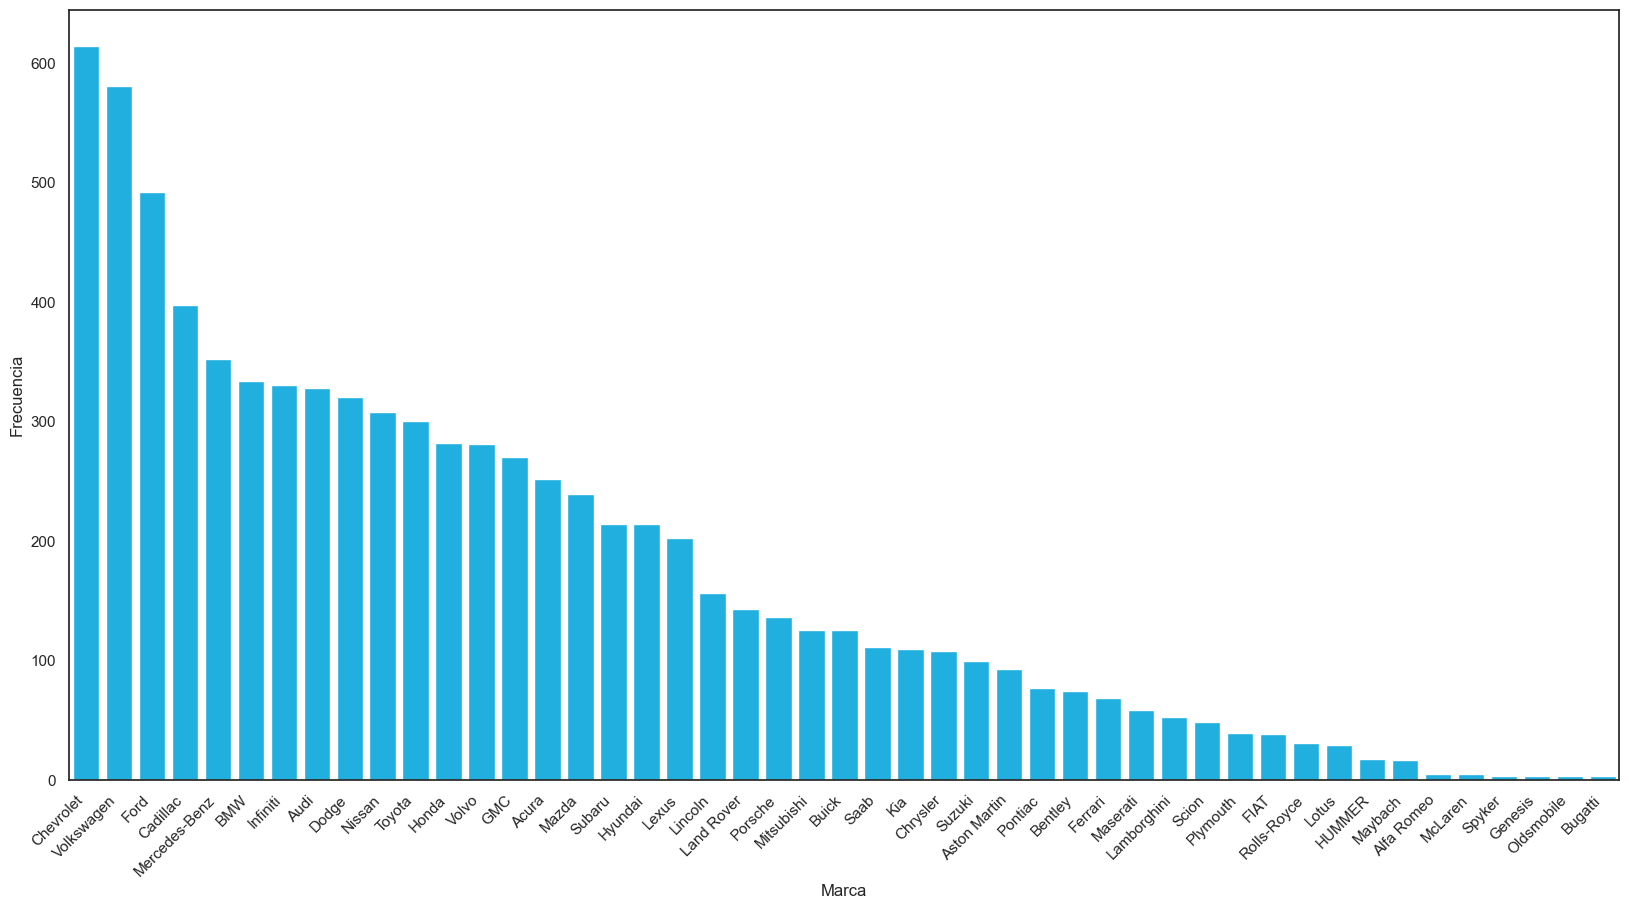

Combustible


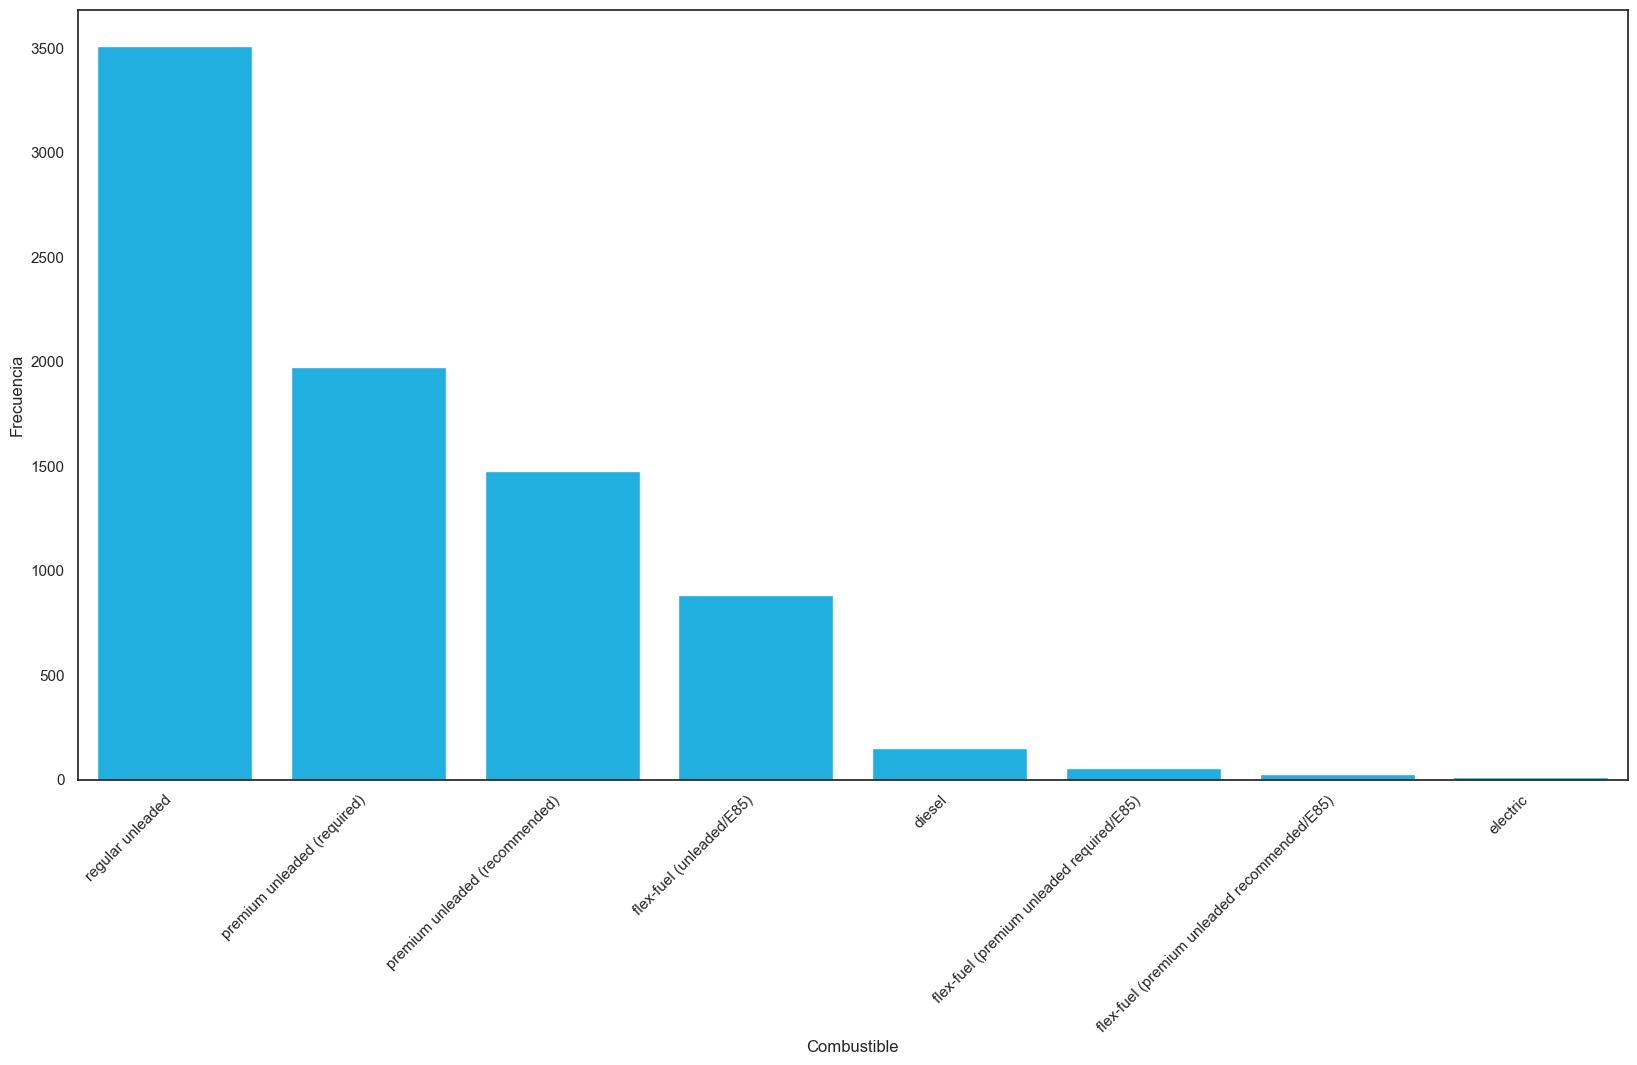

Transmisión


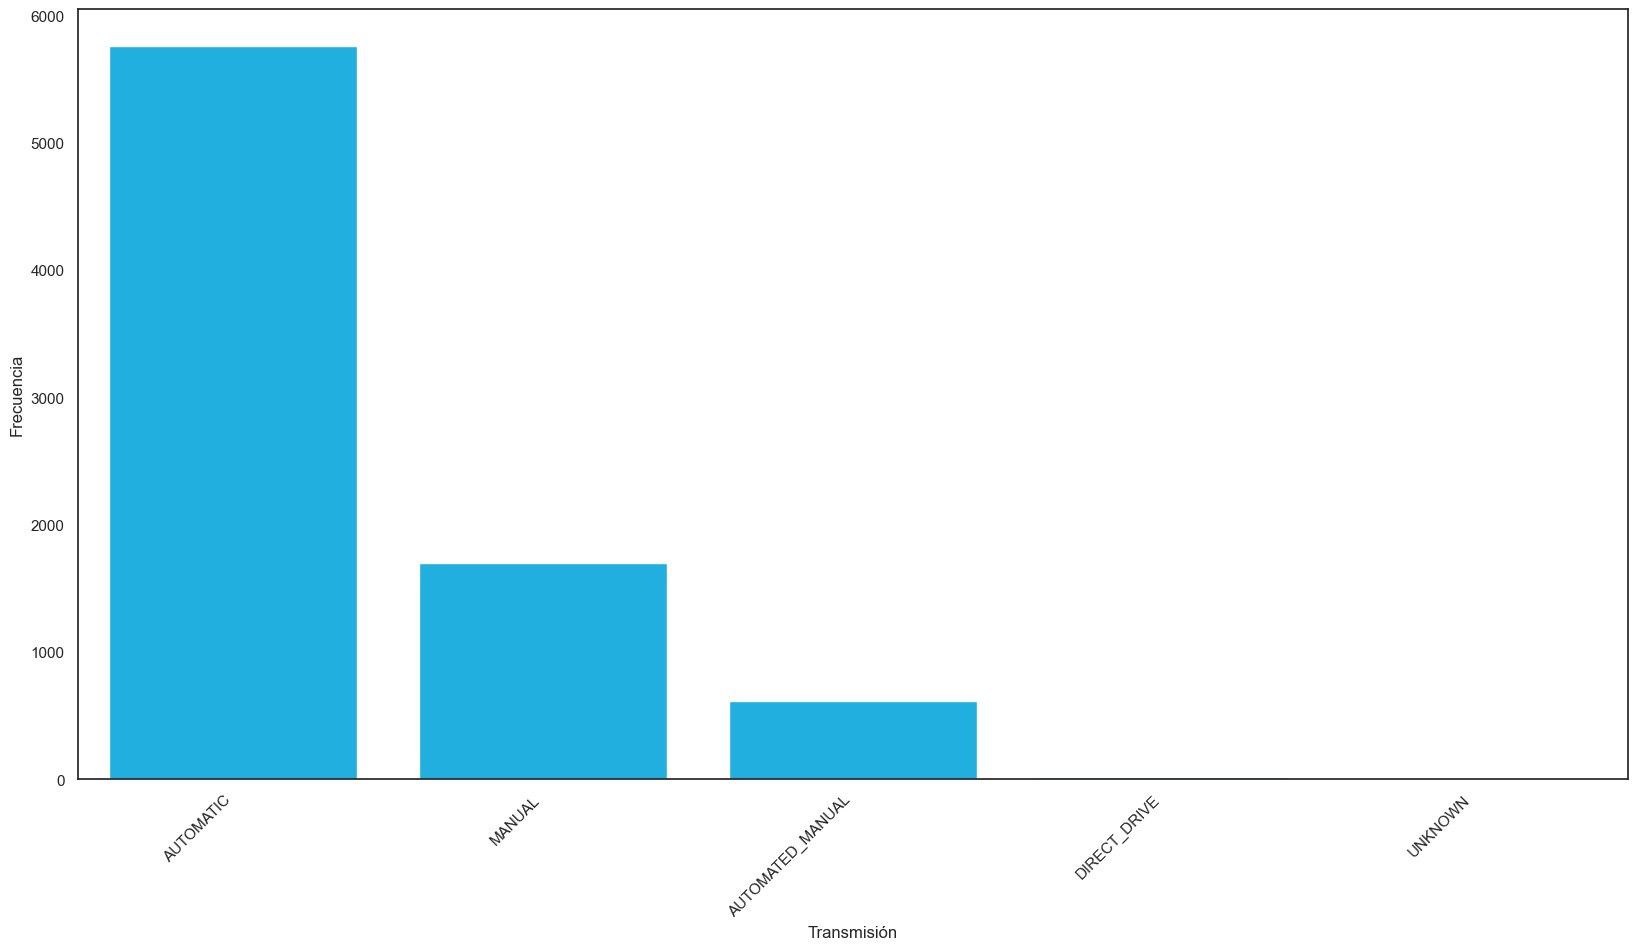

Tracción


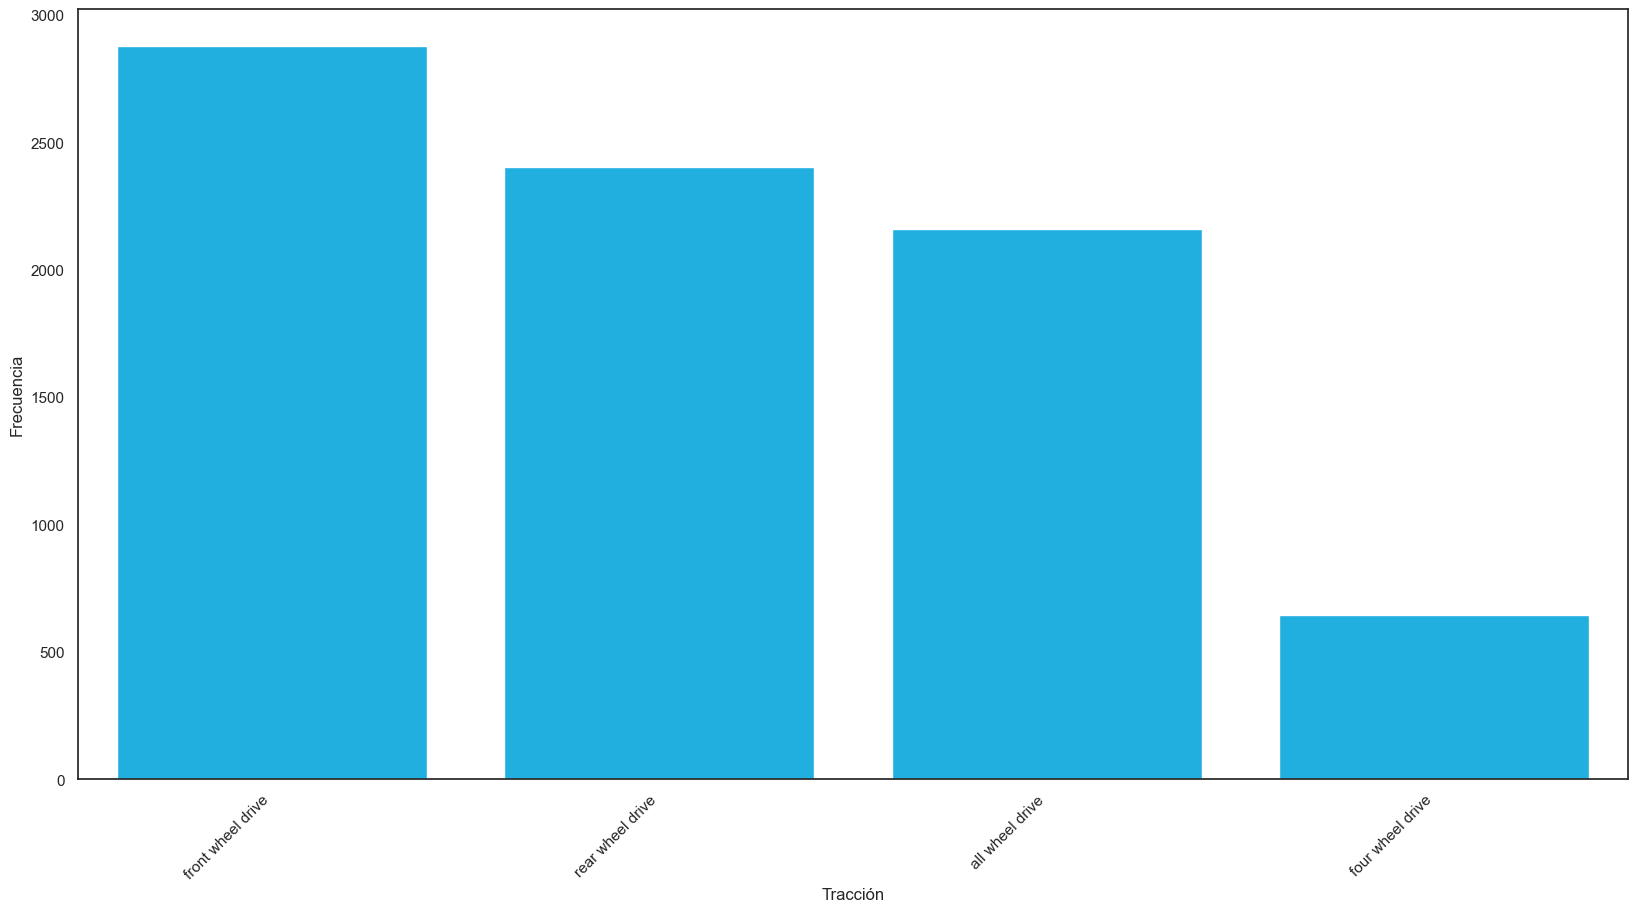

Mercado


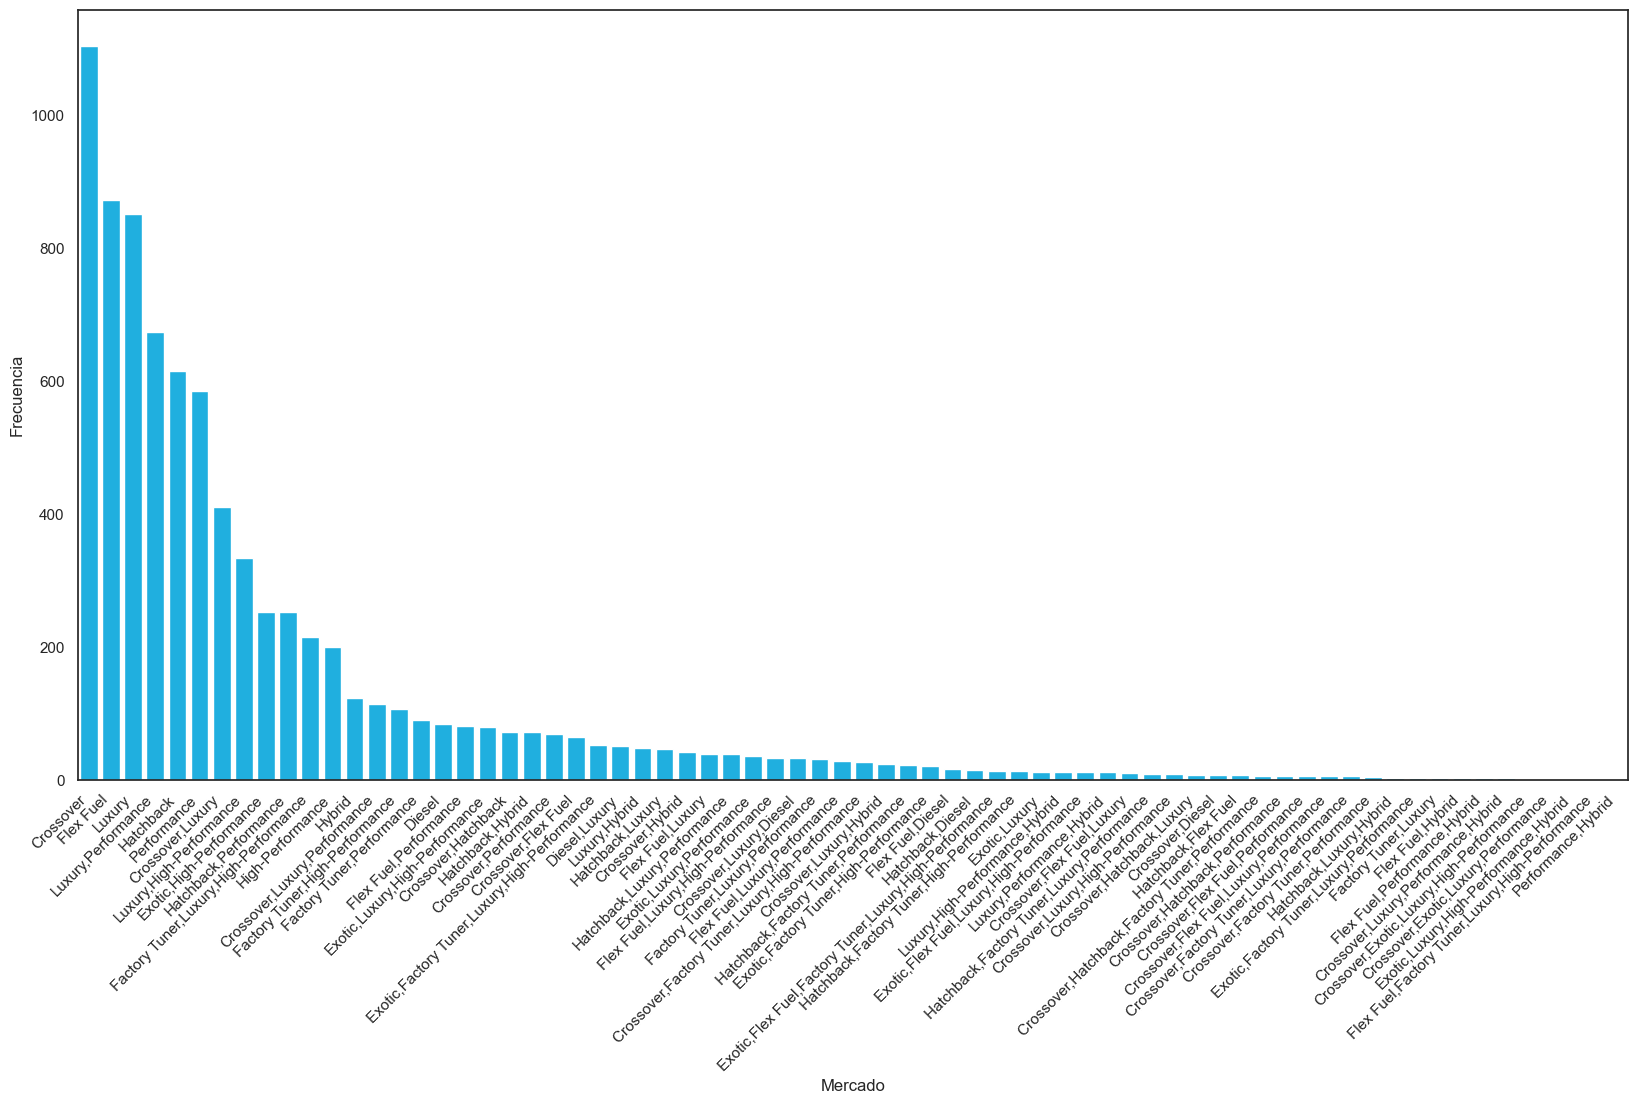

Tamaño


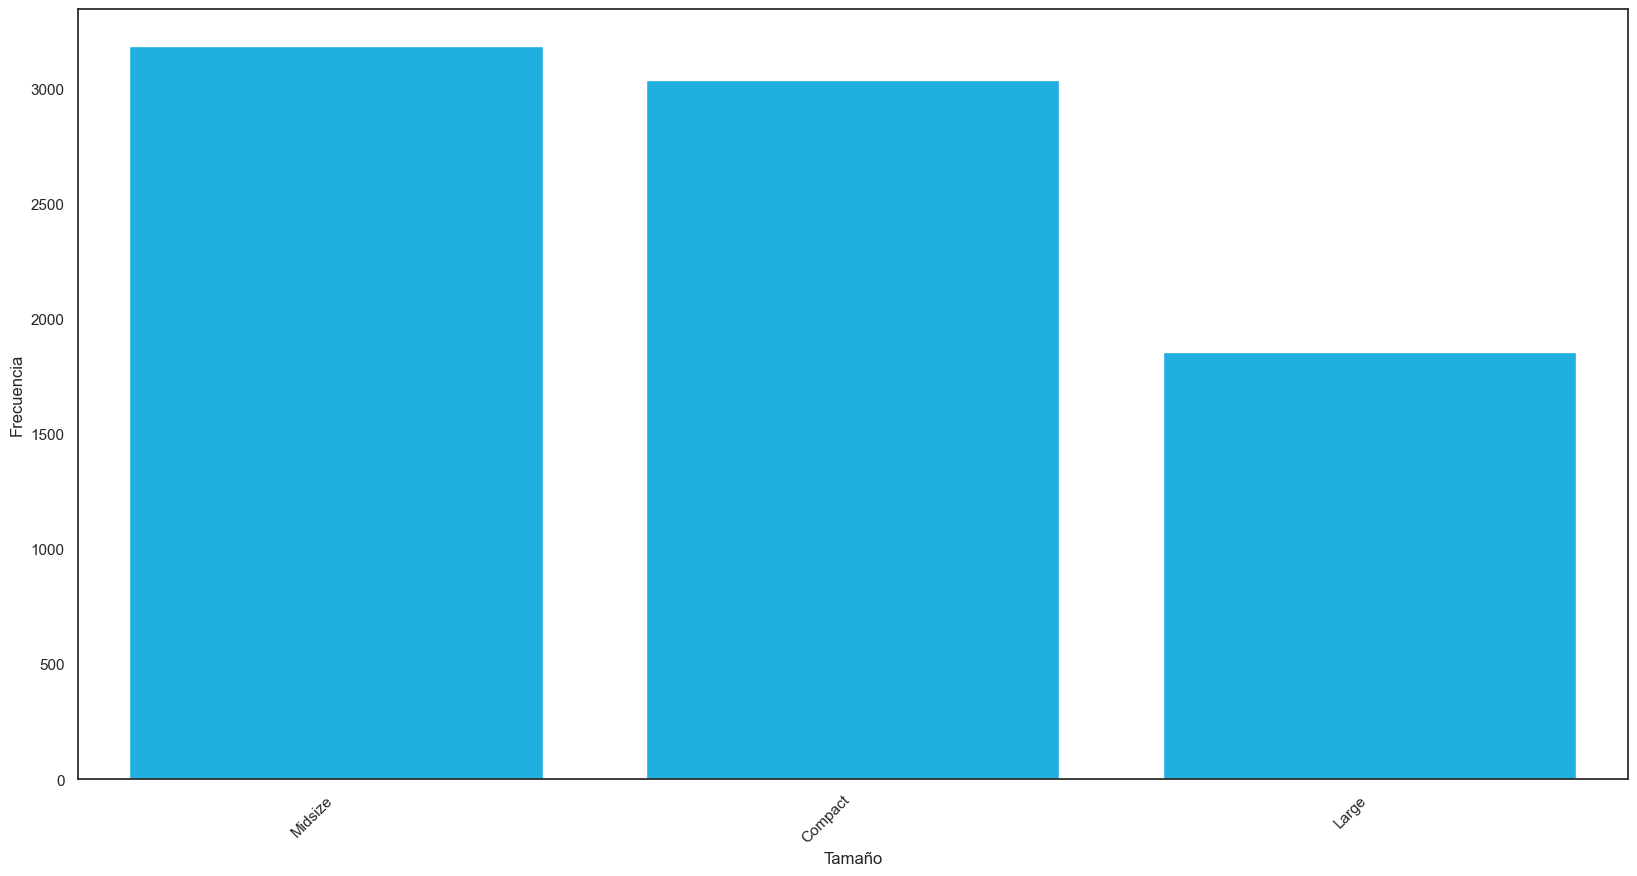

Estilo


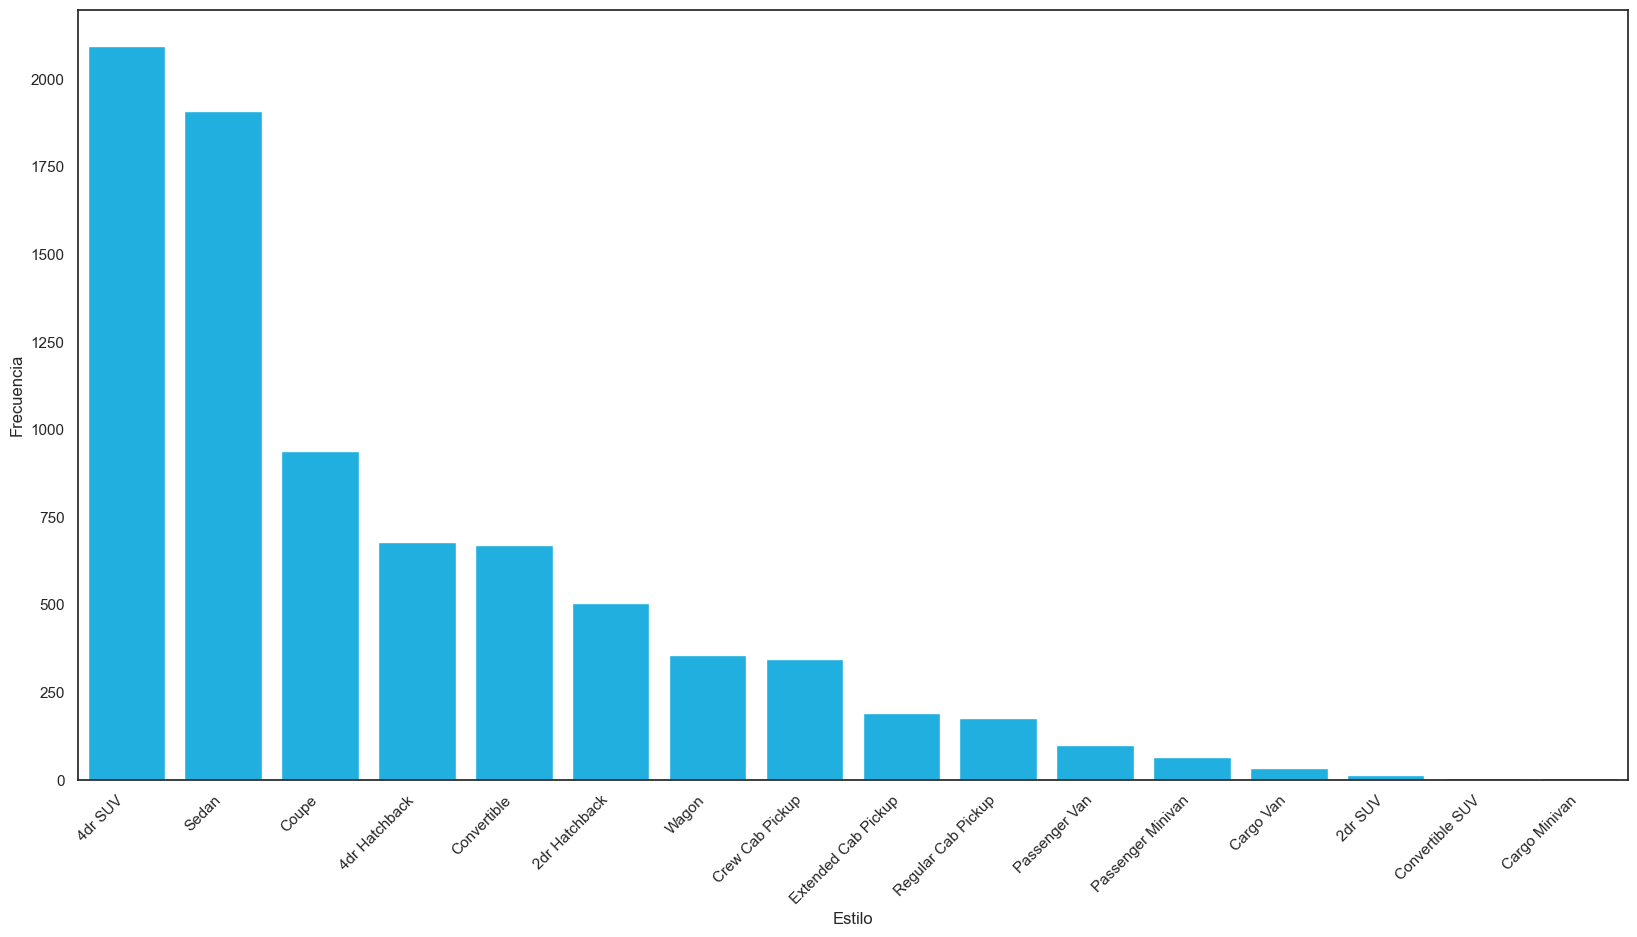

In [14]:
for i in categoric_types.index:
    if categoric_types['Nombre'][i] != 'Modelo':
      print(categoric_types['Nombre'][i])
      column = categoric_types['Nombre'][i]    
      fig, ax = pyplot.subplots(figsize=(20,10))
      chart = seaborn.countplot(data=dataFrame, x=column, color='deepskyblue', order = dataFrame[column].value_counts().index)
      chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');
      chart.set_ylabel('Frecuencia');
      pyplot.show();

### 3.2.2. Variables cuantitativas

Procedamos de manera análoga con las variables cuantitativas y visualizamos sus estadísticos básicos:

In [15]:
print(numeric_types.to_string(index=False))

           Nombre      Tipo de variable    Media  Mínimo     Máximo  Mediana
              Año Cuantitativa discreta  2012.06 1990.00    2017.00  2015.00
               CV Cuantitativa continua   274.64   55.00    1001.00   264.00
        Cilindros Cuantitativa continua     5.78    0.00      16.00     6.00
          Puertas Cuantitativa discreta     3.41    2.00       4.00     4.00
Consumo Carretera Cuantitativa continua    26.65   12.00     354.00    26.00
   Consumo Ciudad Cuantitativa continua    19.55    7.00     137.00    18.00
      Popularidad Cuantitativa discreta  1499.40    2.00    5657.00  1013.00
           Precio Cuantitativa continua 50072.67 2000.00 2065902.00 35005.00


Para conocer su distribución, representamos cada una con un histograma:

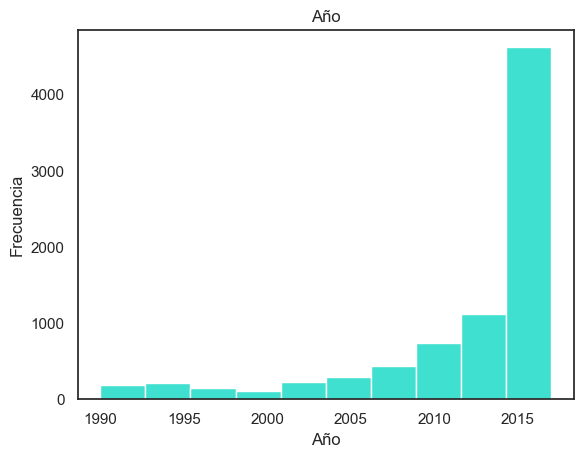

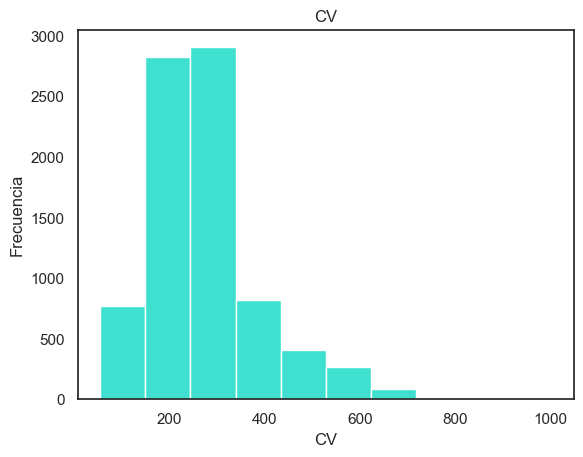

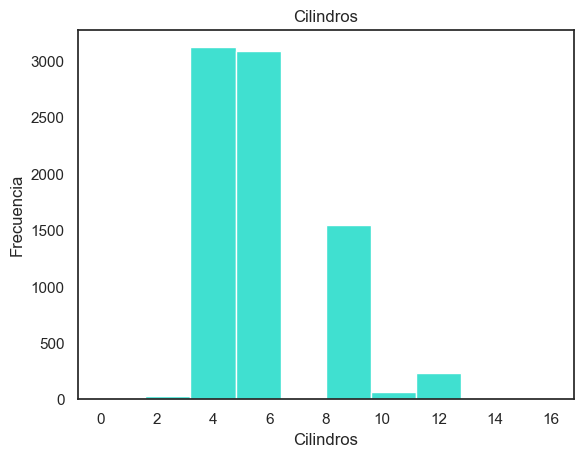

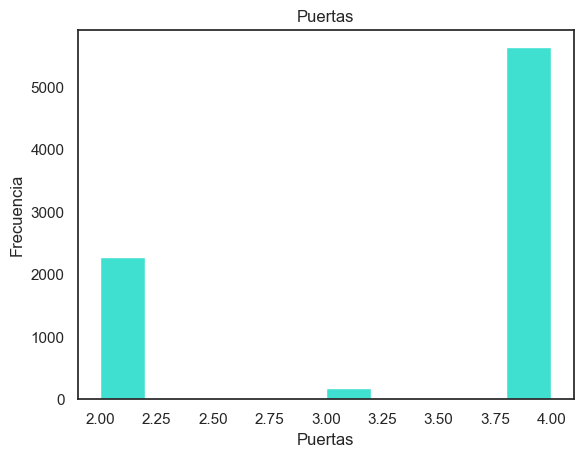

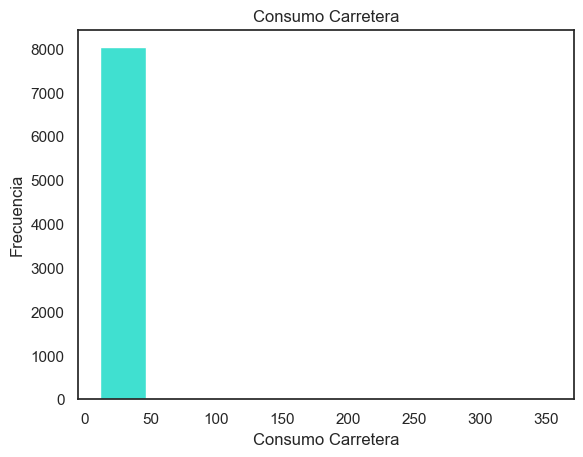

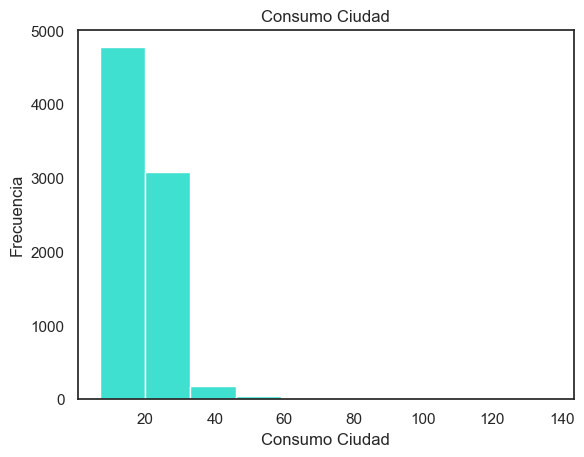

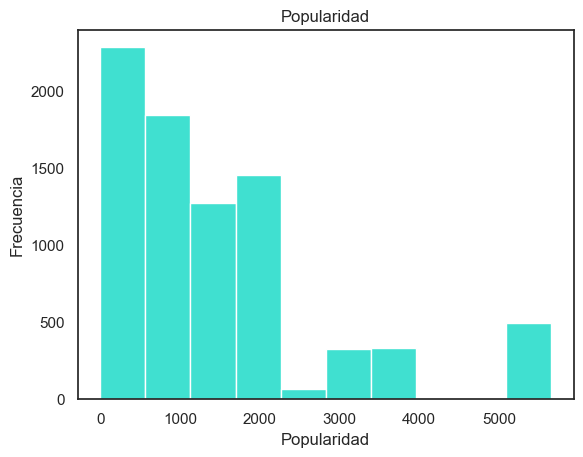

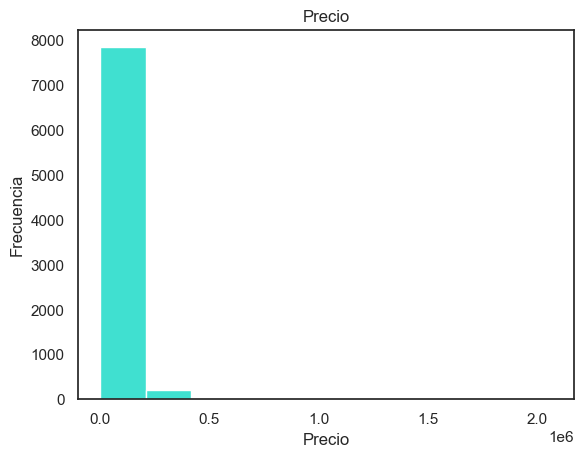

In [16]:
for i in numeric_types.index:
    column = numeric_types['Nombre'][i]
    pyplot.hist(dataFrame[column], color='turquoise')
    pyplot.xlabel(column)
    pyplot.ylabel('Frecuencia')
    pyplot.title(column)
    pyplot.show()

## 3.3. Análisis bivariante

Vamos a realizar el análisis de cada variable frente a la variable objetivo, que en este caso es el **Precio**.

### 3.3.1. Variables cualitativas vs. Variable objetivo

Para conocer el comportamiento de las variables cualitativas frente a la variable objetivo, utilizamos diagramas de barras (BarPlot).

Marca


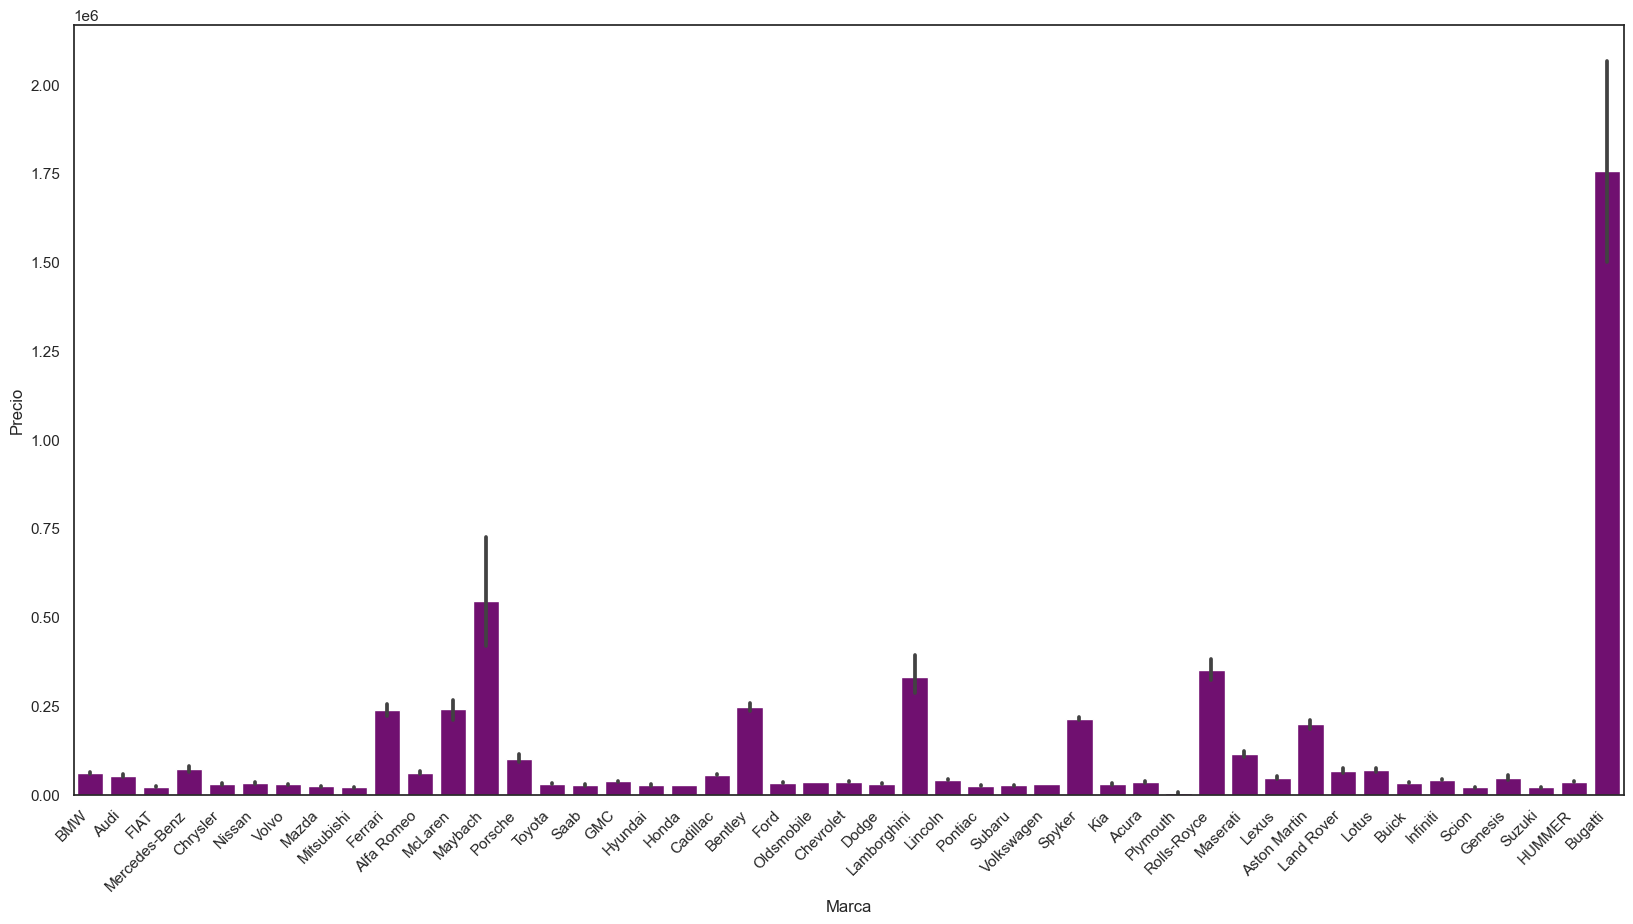

Combustible


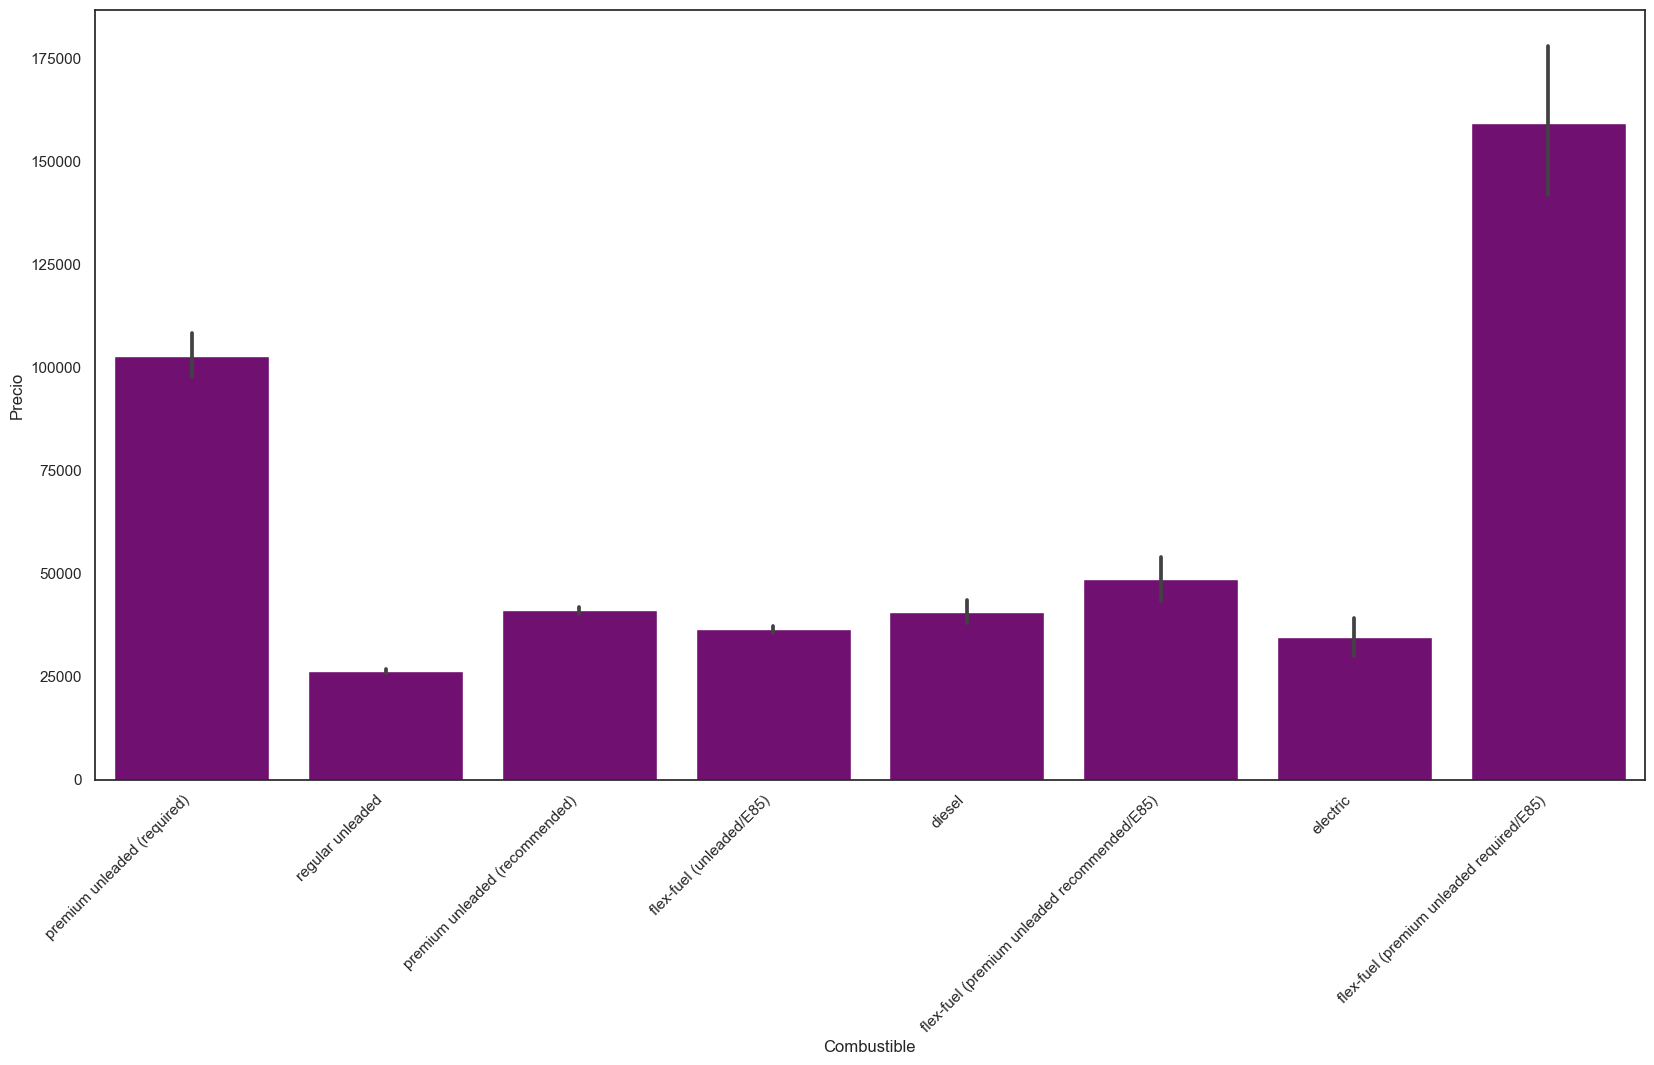

Transmisión


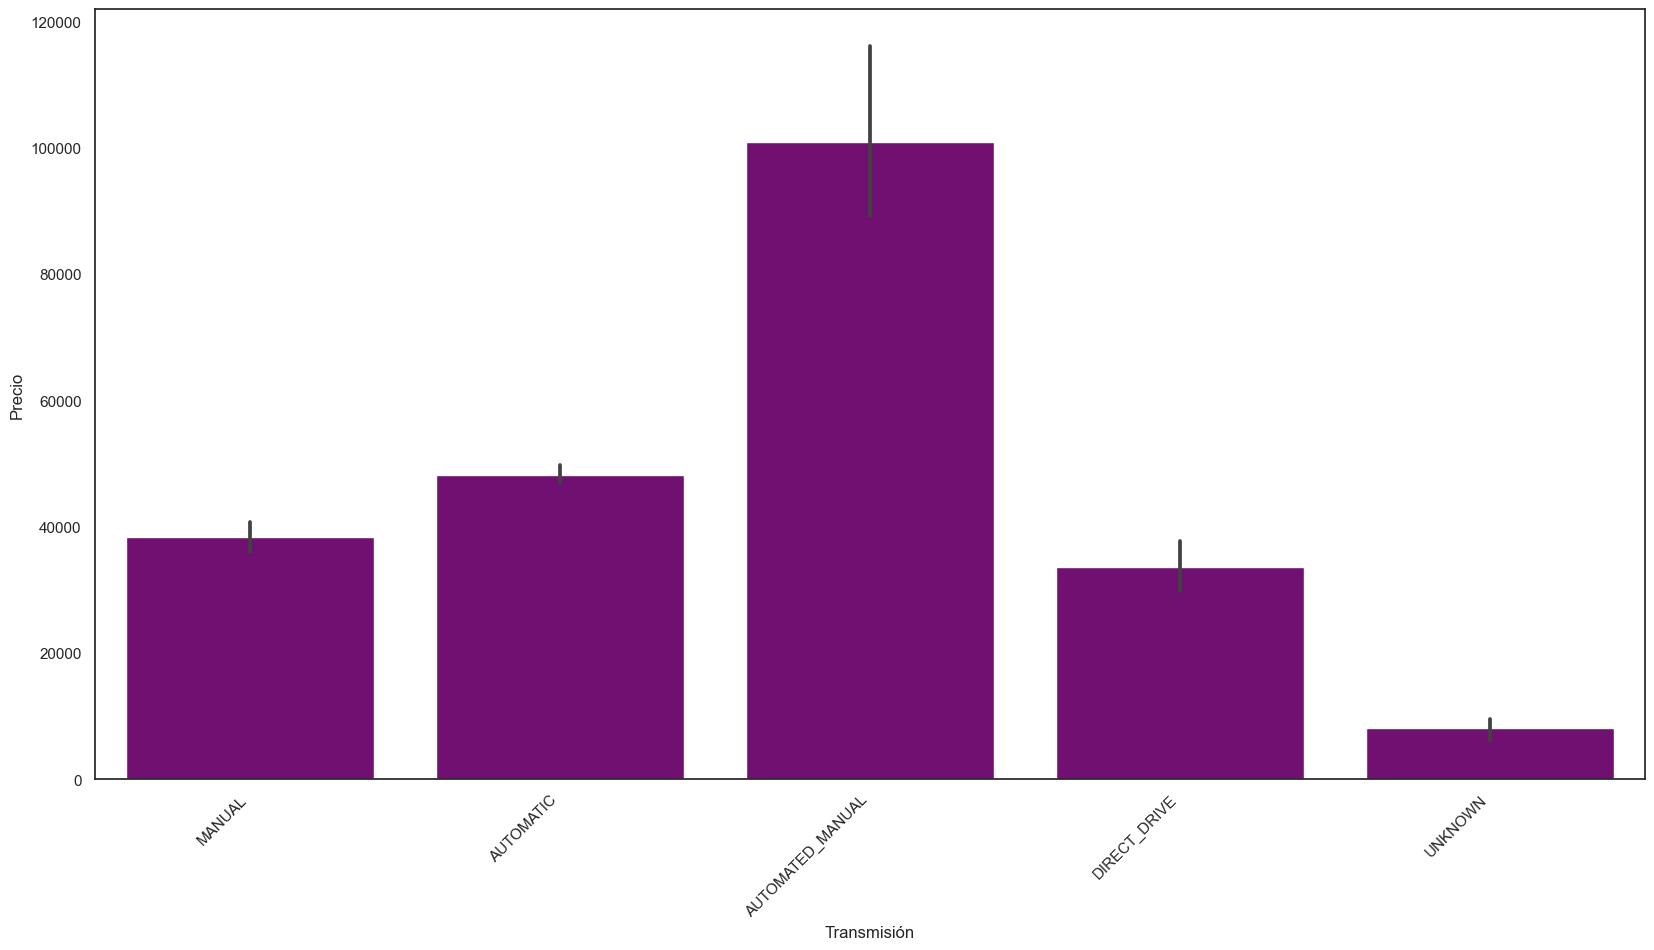

Tracción


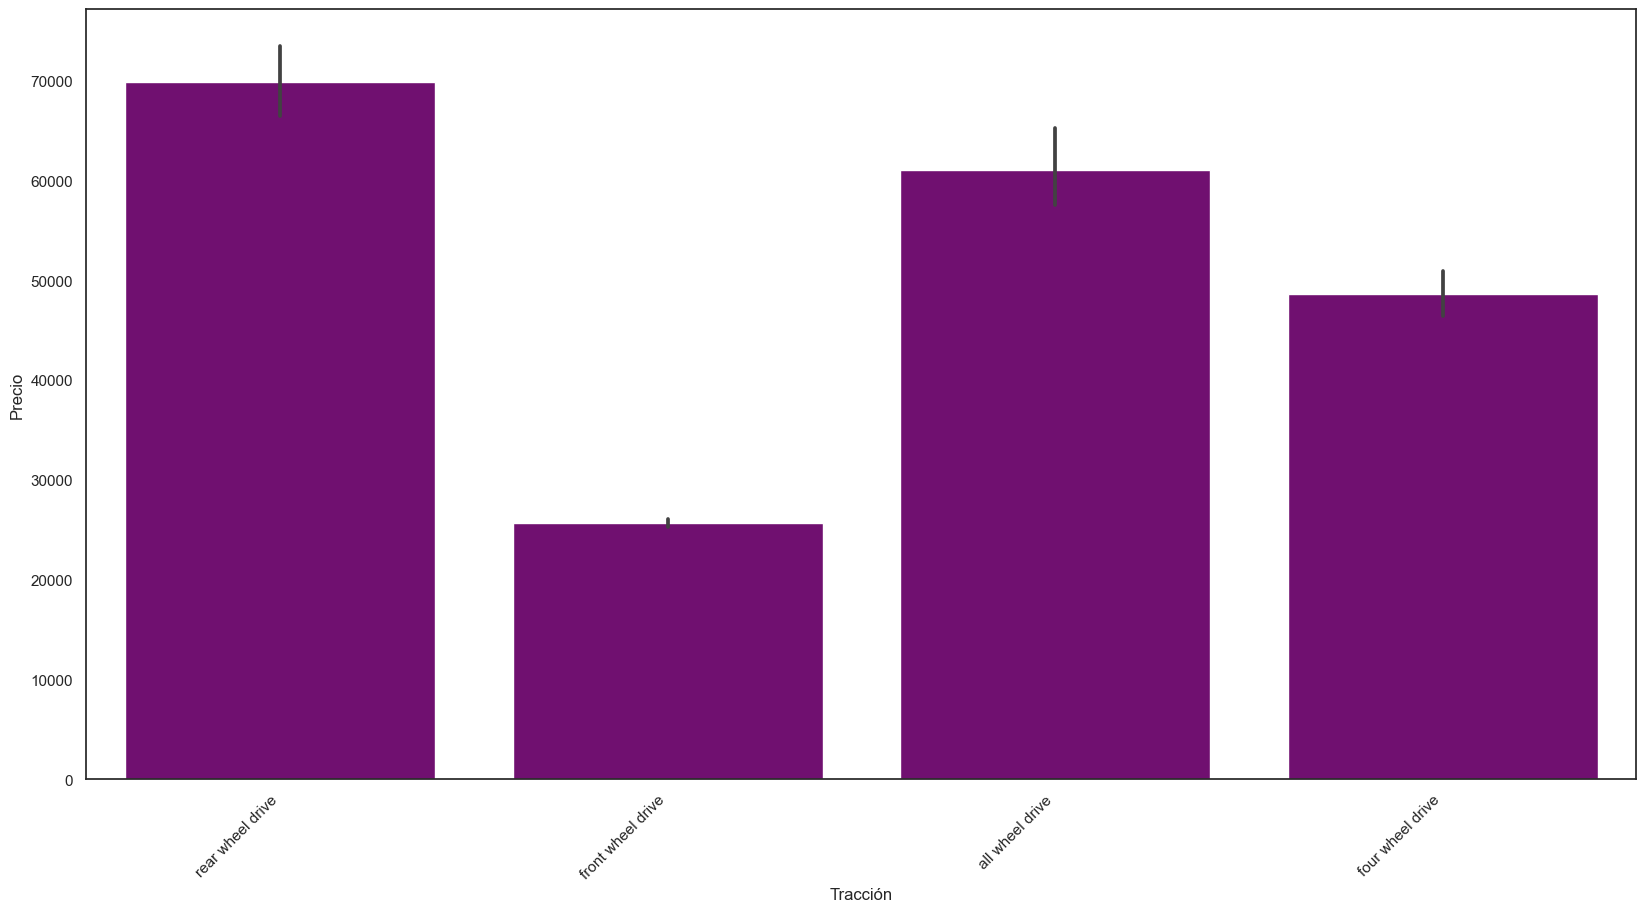

Mercado


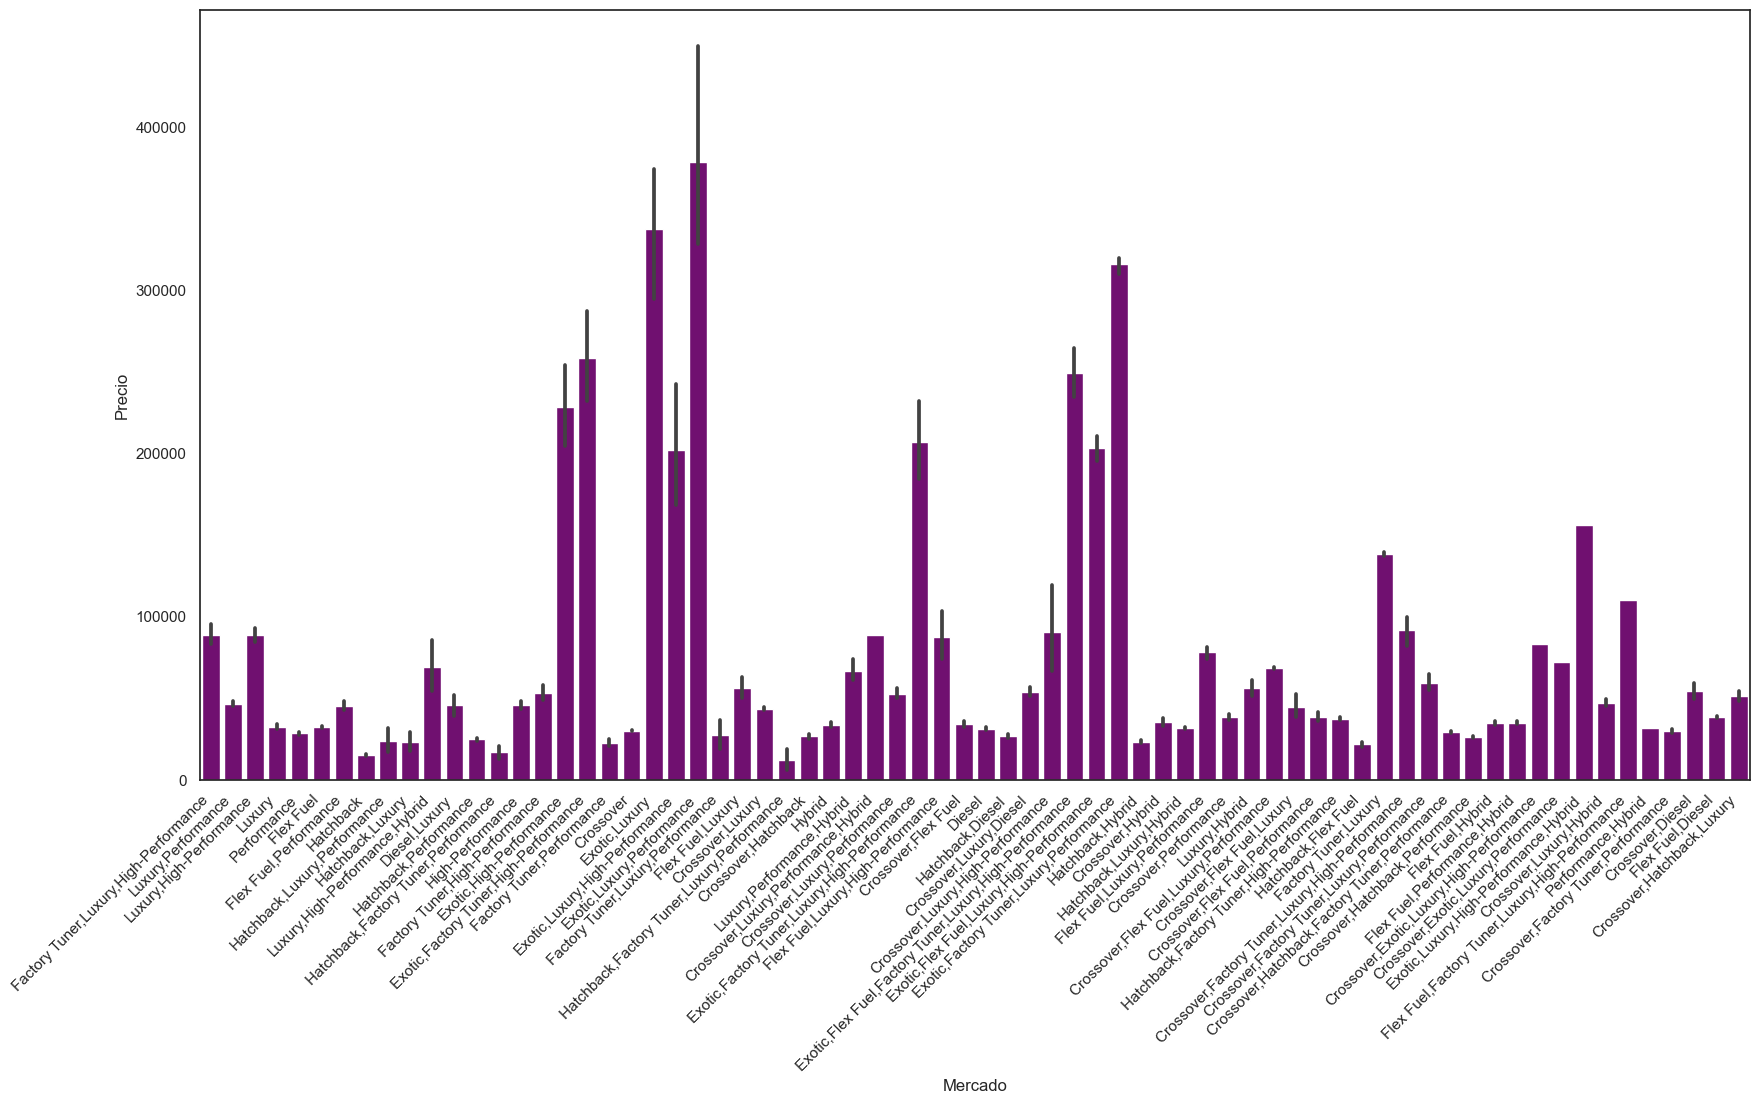

Tamaño


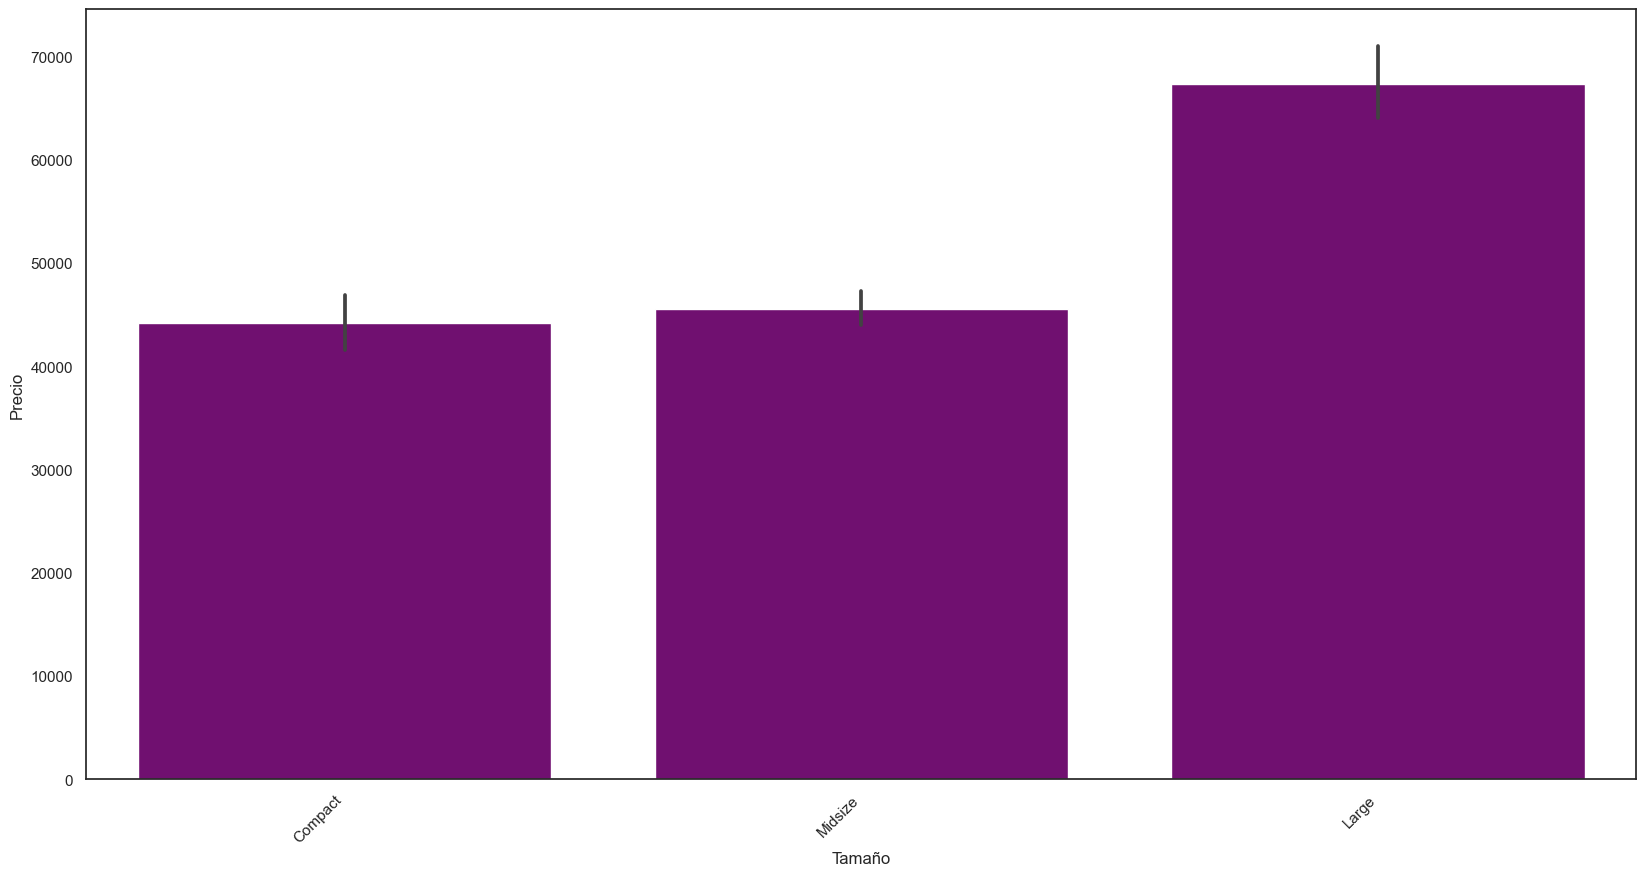

Estilo


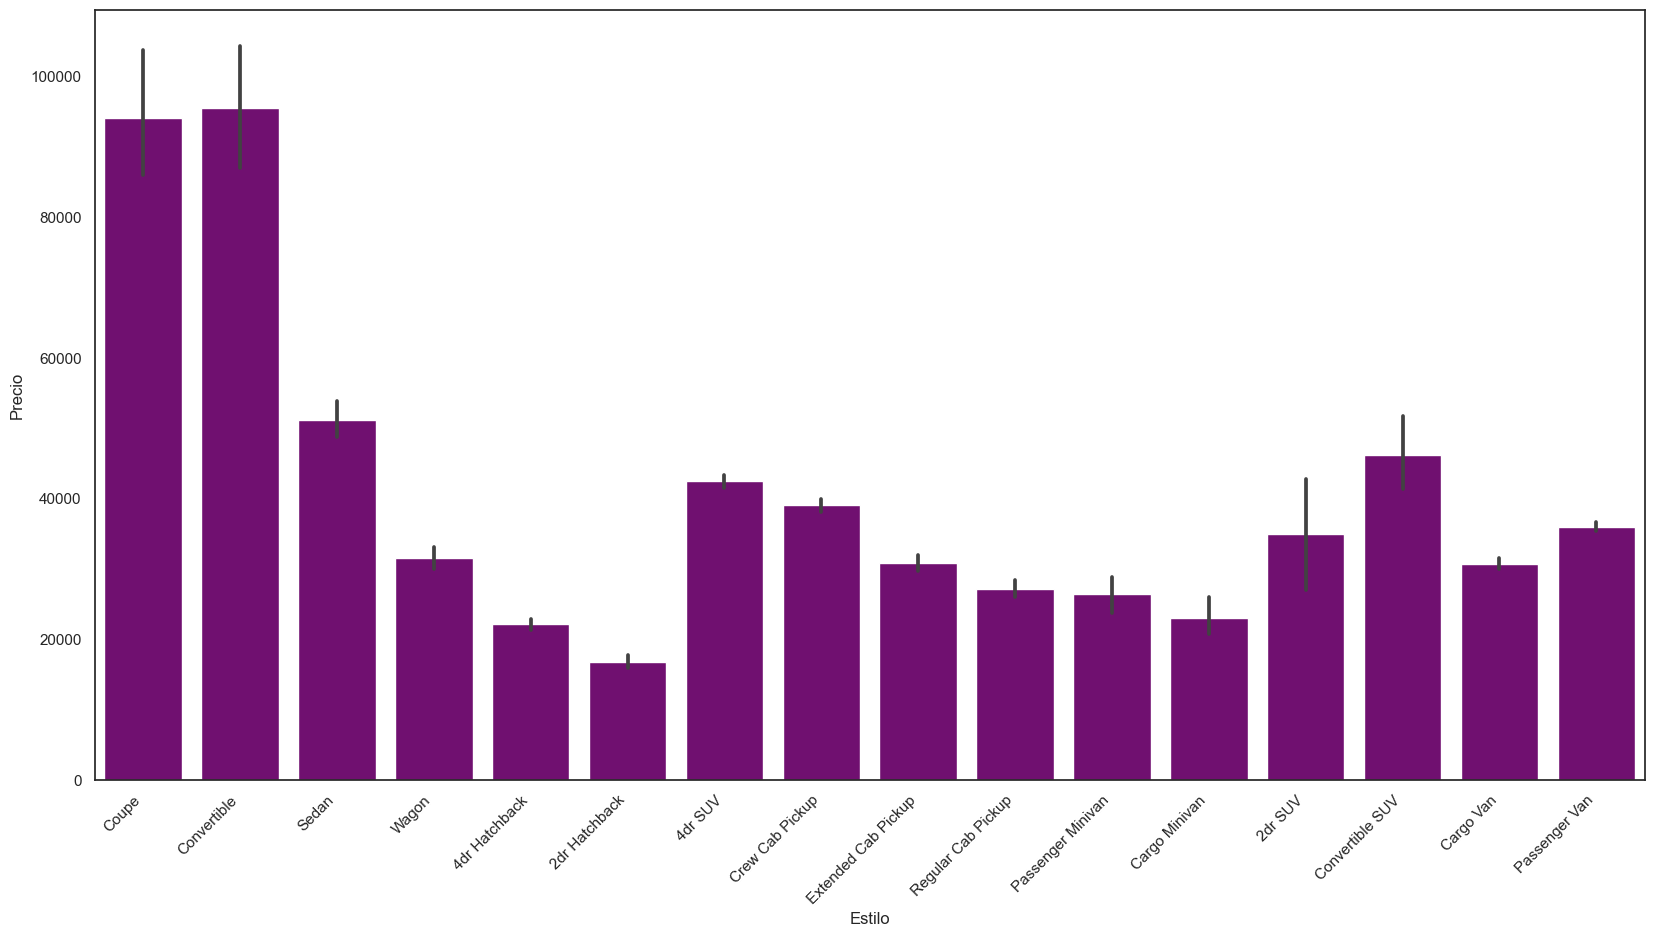

In [17]:
for i in categoric_types.index:
    if categoric_types['Nombre'][i] != 'Modelo':
        print(categoric_types['Nombre'][i])
        x_axis = categoric_types['Nombre'][i]  
        y_axis = 'Precio'
        fig, ax = pyplot.subplots(figsize=(20,10))
        chart = seaborn.barplot(data=dataFrame, x=x_axis, y=y_axis, color='purple')
        chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right');
        pyplot.show();

De manera global, observamos ciertas diferencias en el precio en función de ciertas marcas o características de los coches.

### 3.3.2. Variables cuantitativas vs. Variable objetivo

En este caso, para conocer el comportamiento de las variables cuantitativas frente a la variable objetivo, utilizamos gráficos de dispersión (ScatterPlot).

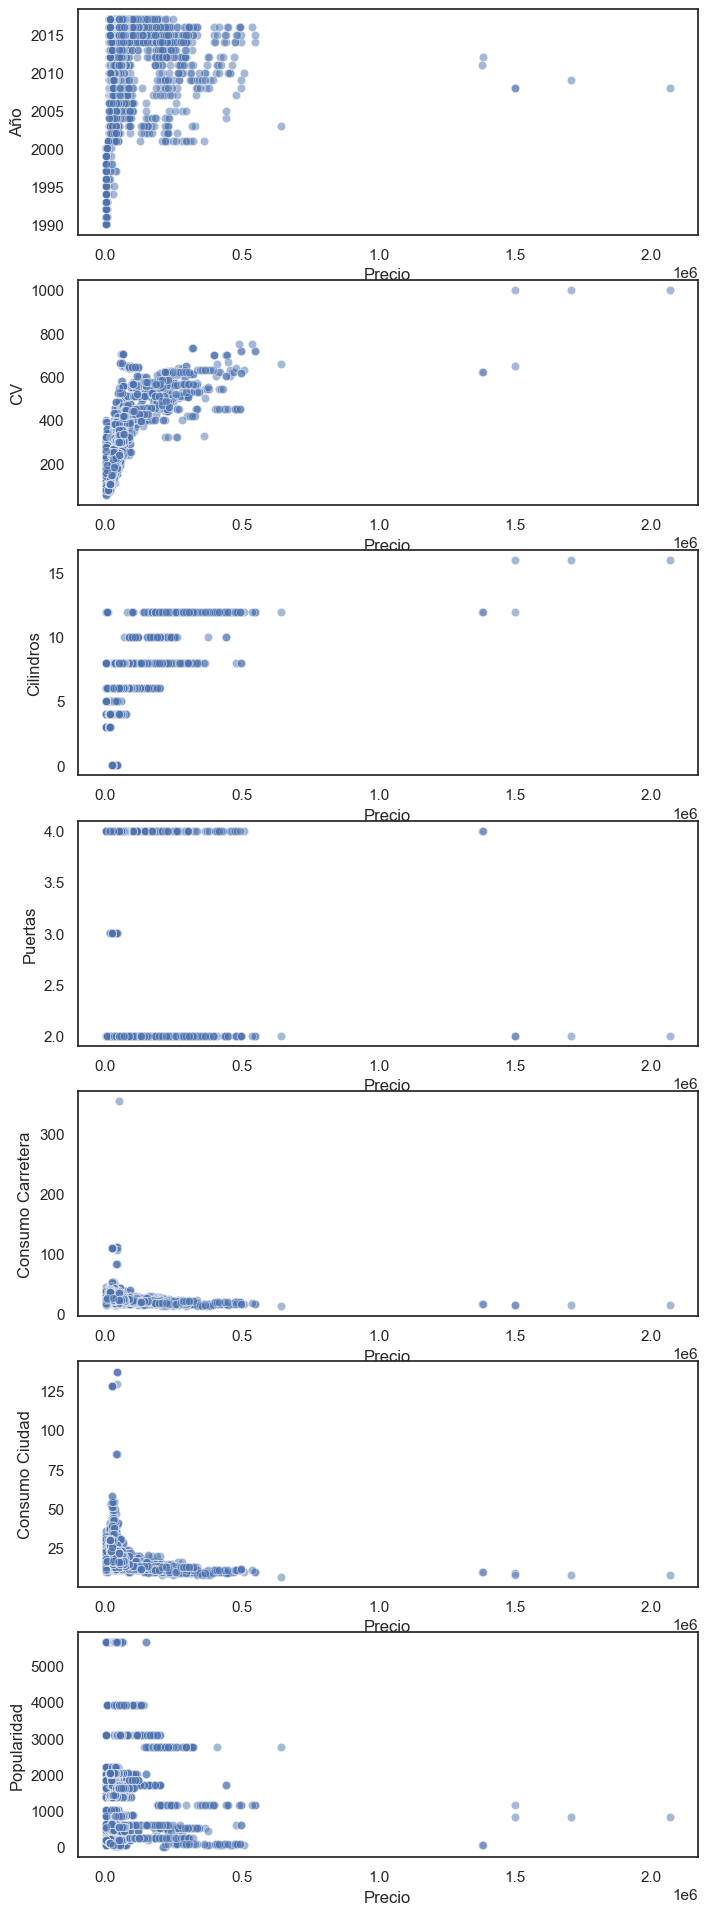

In [18]:
fig, axs = pyplot.subplots(figsize=(8,24), nrows=7)
seaborn.scatterplot(data=dataFrame, x='Precio', y='Año', ax=axs[0], alpha=0.5)
seaborn.scatterplot(data=dataFrame, x='Precio', y='CV', ax=axs[1], alpha=0.5)
seaborn.scatterplot(data=dataFrame, x='Precio', y='Cilindros', ax=axs[2], alpha=0.5)
seaborn.scatterplot(data=dataFrame, x='Precio', y='Puertas', ax=axs[3], alpha=0.5)
seaborn.scatterplot(data=dataFrame, x='Precio', y='Consumo Carretera', ax=axs[4], alpha=0.5)
seaborn.scatterplot(data=dataFrame, x='Precio', y='Consumo Ciudad', ax=axs[5], alpha=0.5)
seaborn.scatterplot(data=dataFrame, x='Precio', y='Popularidad', ax=axs[6], alpha=0.5);

En general, no se aprecia una clara distribución uniforme entre los valores que nos indique posibles relaciones. No obstante, de manera moderada se puede destacar el caso de las variables 'CV' y 'Cilindros'.

## 3.4. Análisis multivariable

Tras el estudio frente a la variable objetivo, calculamos la matriz de correlación para analizar las dependencias entre variables cuantitativas.

/var/folders/cf/7nzhdlvs5nl0_zh6ky9hz9vc0000gn/T/ipykernel_2429/670913111.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dataFrame.corr()


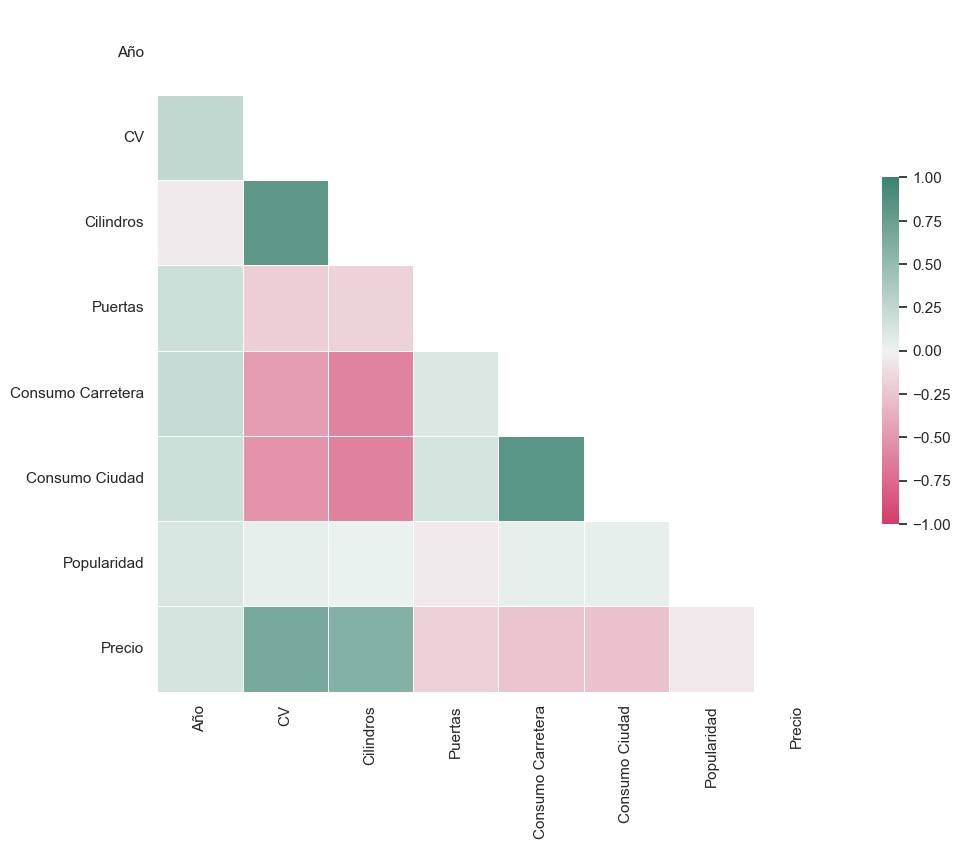

In [19]:
correlation = dataFrame.corr()
mask = numpy.triu(numpy.ones_like(correlation, dtype=bool))
f, ax = pyplot.subplots(figsize=(11, 9))
cmap = seaborn.diverging_palette(0, 165, as_cmap=True)
seaborn.set_theme(style="white")
seaborn.heatmap(correlation, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

In [20]:
dataFrame.corr()

/var/folders/cf/7nzhdlvs5nl0_zh6ky9hz9vc0000gn/T/ipykernel_2429/3497904997.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.corr()


,Año,CV,Cilindros,Puertas,Consumo Carretera,Consumo Ciudad,Popularidad,Precio
Año,1.00,0.24,-0.05,0.18,0.22,0.18,0.12,0.13
CV,0.24,1.00,0.81,-0.20,-0.47,-0.51,0.04,0.66
Cilindros,-0.05,0.81,1.00,-0.18,-0.60,-0.62,0.01,0.59
Puertas,0.18,-0.20,-0.18,1.00,0.10,0.14,-0.04,-0.18
Consumo Carretera,0.22,-0.47,-0.60,0.10,1.00,0.82,0.03,-0.26
Consumo Ciudad,0.18,-0.51,-0.62,0.14,0.82,1.00,0.04,-0.27
Popularidad,0.12,0.04,0.01,-0.04,0.03,0.04,1.00,-0.05
Precio,0.13,0.66,0.59,-0.18,-0.26,-0.27,-0.05,1.00


Los coeficientes de correlación más altos, y de signo positivo, se encuentran entre las variables 'Consumo carretera' y 'Consumo ciudad' y entre 'CV' y 'Cilindros'. De manera más moderada hay una correlación positiva entre las variables 'CV' y 'Cilindros' con la variable 'Precio', respectivamente (como se apuntó en el apartado anterior).
Destacan también las correlaciones negativas y moderadas entre la variable 'Cilindros' con las variables 'Consumo carretera' y 'Consumo ciudad'.

Para analizar de forma gráfica la relación entre dos variables cualitativas, proponemos el uso de un heatmap de la siguiente manera:

/var/folders/cf/7nzhdlvs5nl0_zh6ky9hz9vc0000gn/T/ipykernel_2429/4262448383.py:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  .apply(lambda x: 100 * x / float(x.sum()))


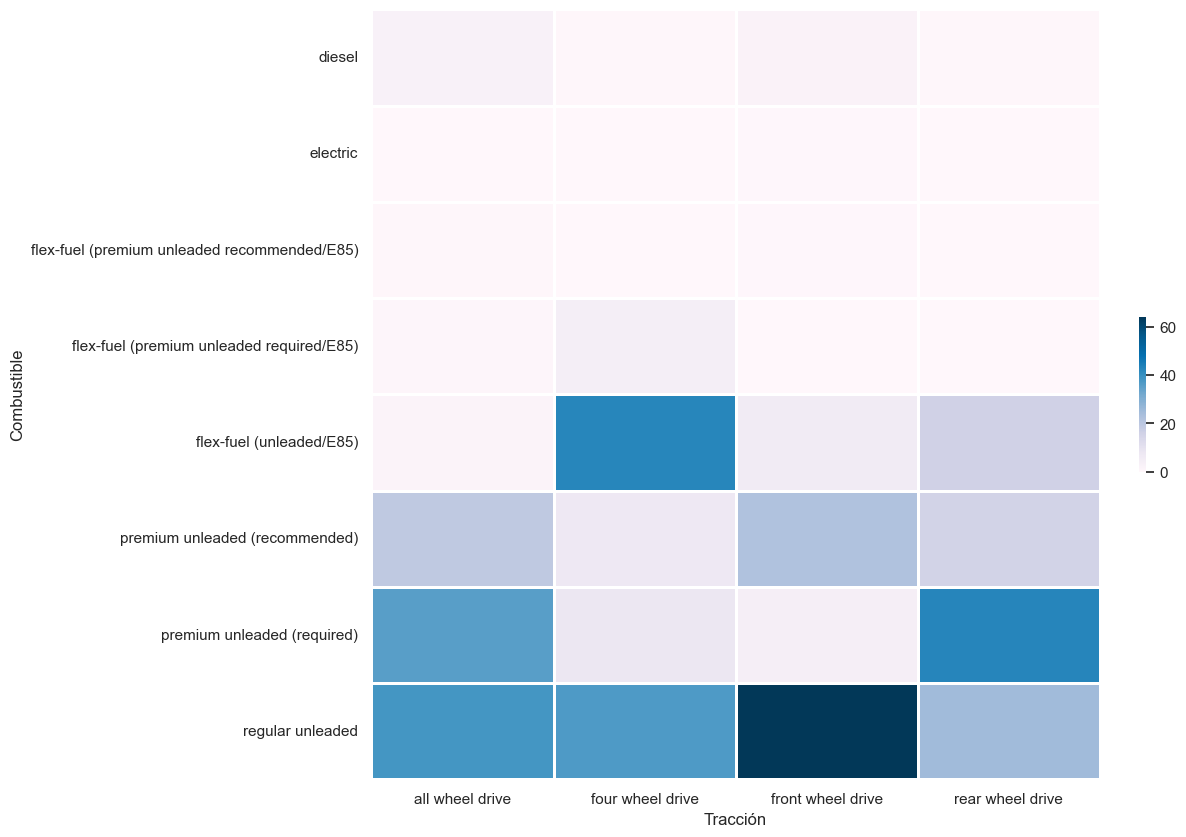

In [21]:
by_maker = (dataFrame
            .groupby(['Combustible', 'Tracción'])
            .size()
            .groupby(level=1)
            .apply(lambda x: 100 * x / float(x.sum()))
            .unstack()
           )
by_maker.fillna(0, inplace=True)
pyplot.figure(figsize=(10,10))
g = seaborn.heatmap(
    by_maker, 
    square=False,
    cbar_kws={'fraction' : 0.01},
    cmap='PuBu',
    linewidth=1
)

En este caso, la relación más alta se produce entre el valor 'regular unleaded' de la variable 'Combustible' con la dimensión 'front wheel drive' de la variable 'Tracción'.

## 3.5. Calidad del dato

Habiendo identificado previamente los valores nulos, indicamos a continuación el procedimiento para contar los registros u ocurrencias válidas:

In [22]:
print("Número de filas válidas por columna:")
print(dataFrame.count().to_string())

Número de filas válidas por columna:
Marca                8084
Modelo               8084
Año                  8084
Combustible          8084
CV                   8084
Cilindros            8084
Transmisión          8084
Tracción             8084
Puertas              8084
Mercado              8084
Tamaño               8084
Estilo               8084
Consumo Carretera    8084
Consumo Ciudad       8084
Popularidad          8084
Precio               8084


El valor obtenido (8084) es menor al número total de filas identificadas en la descripción general de los datos (11914), pues como se había señado existen valores nulos.

### 3.5.2. Detectar valores atípicos

Analizamos los valores atípicos de las variables cuantitativas para descartarlos posteriormente.

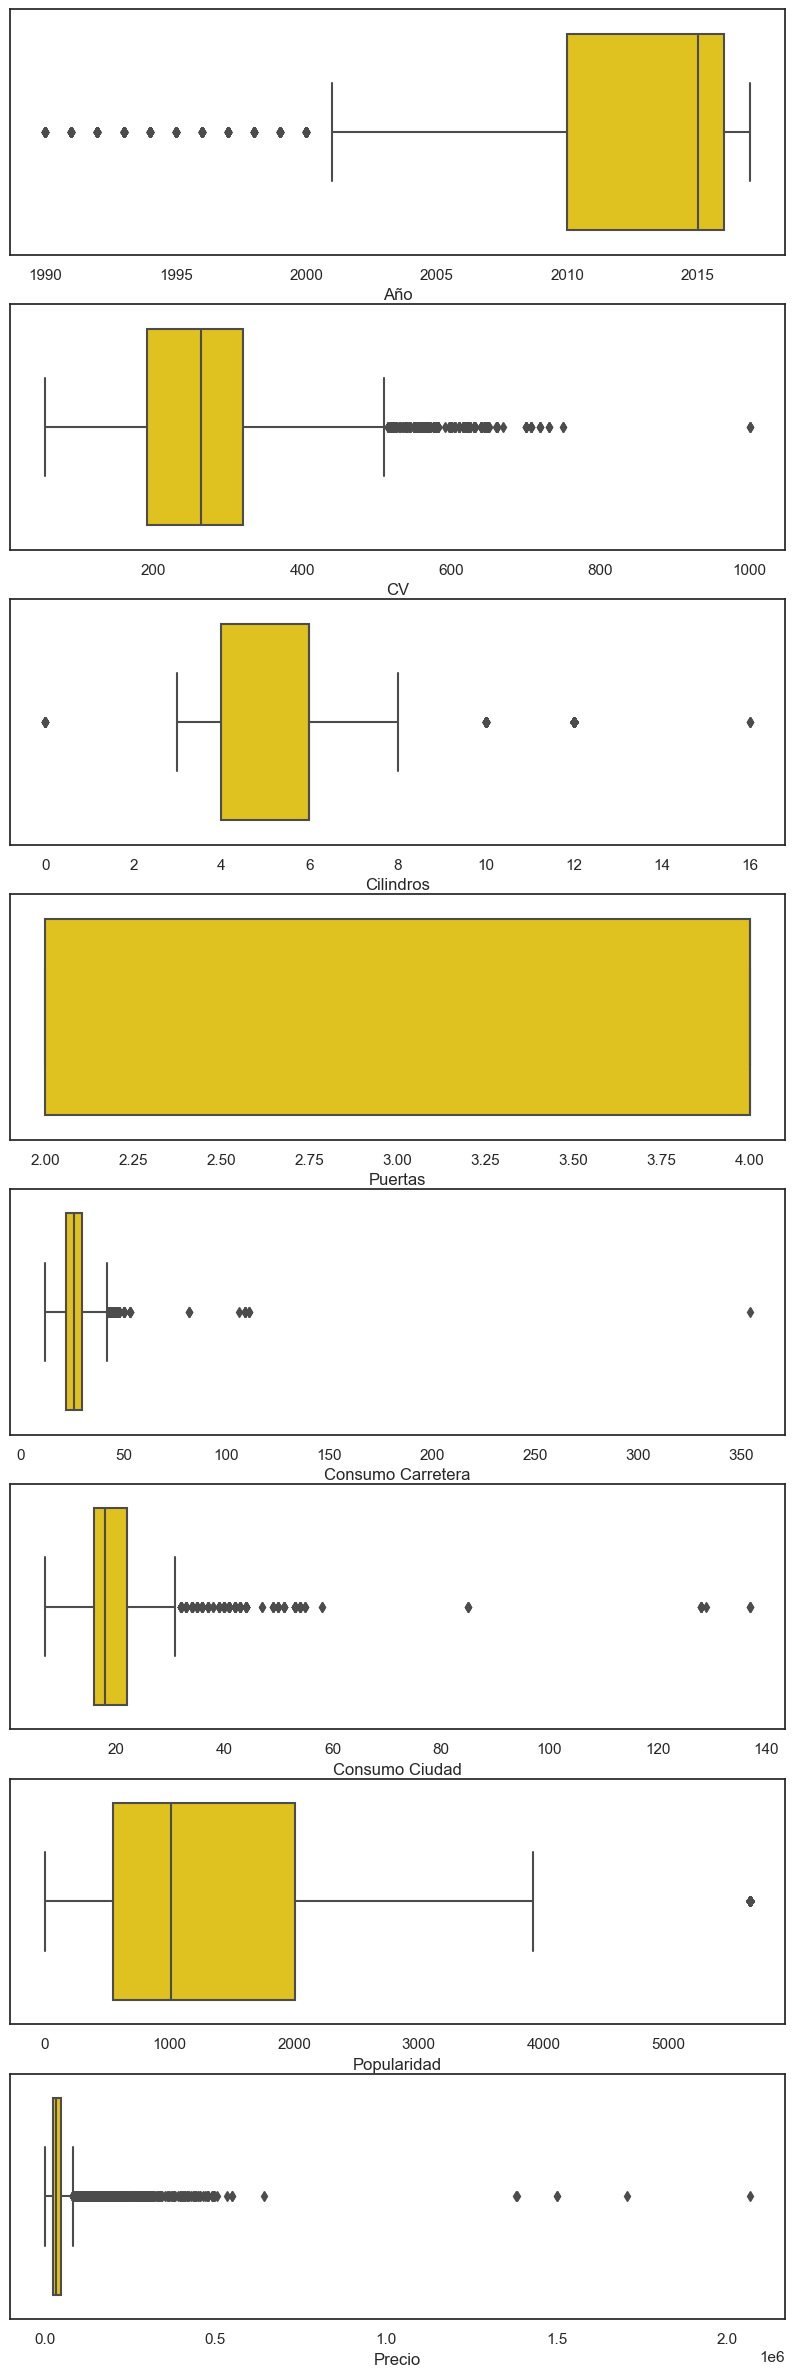

In [23]:
fig, axs = pyplot.subplots(figsize=(10,30),nrows=8)
seaborn.boxplot(x=dataFrame['Año'], ax=axs[0], color='gold')
seaborn.boxplot(x=dataFrame['CV'], ax=axs[1], color='gold')
seaborn.boxplot(x=dataFrame['Cilindros'], ax=axs[2], color='gold')
seaborn.boxplot(x=dataFrame['Puertas'], ax=axs[3], color='gold')
seaborn.boxplot(x=dataFrame['Consumo Carretera'], ax=axs[4], color='gold')
seaborn.boxplot(x=dataFrame['Consumo Ciudad'], ax=axs[5], color='gold')
seaborn.boxplot(x=dataFrame['Popularidad'], ax=axs[6], color='gold')
seaborn.boxplot(x=dataFrame['Precio'], ax=axs[7], color='gold');

# 4. Preparación de los datos

## 4.1. Seleccionar los datos

Con la fase de preparación de datos, se inicia el proceso ETL (extract, transform and load).
El objetivo de esta fase es construir un dataset que reúna todas las variables definidas en el modelo de negocio y que permita empezar la implementación del modelo analítico en la
siguiente fase.

## 4.2. Limpieza de datos

### 4.2.1. Eliminar nulos

Nos aseguramos que se han eliminado los datos nulos y recordamos el número de valores válidos por cada atributo.

In [24]:
print("Eliminando datos nulos:")
print()
dataFrame = dataFrame.dropna()

print("Número de filas válidas por columna:")
print(dataFrame.count().to_string())

Eliminando datos nulos:

Número de filas válidas por columna:
Marca                8084
Modelo               8084
Año                  8084
Combustible          8084
CV                   8084
Cilindros            8084
Transmisión          8084
Tracción             8084
Puertas              8084
Mercado              8084
Tamaño               8084
Estilo               8084
Consumo Carretera    8084
Consumo Ciudad       8084
Popularidad          8084
Precio               8084


### 4.2.2. Eliminar registros duplicados

Ahora se descartan los registros duplicados.

In [25]:
print(f'Número de filas: {dataFrame.shape[0]}')
print(f'Número de columnas: {dataFrame.shape[1]}')
print()
print('Eliminando filas con valores duplicados')
dataFrame = dataFrame.drop_duplicates()
print()
print(f'Número de filas: {dataFrame.shape[0]}')
print(f'Número de columnas: {dataFrame.shape[1]}')

Número de filas: 8084
Número de columnas: 16

Eliminando filas con valores duplicados

Número de filas: 7735
Número de columnas: 16


### 4.2.3. Eliminar valores atípicos

Además de las filas duplicadas eliminadas en el paso anterior, es importante descartar los valores atípicos.

Número de filas (con valores atípicos): 7735
Eliminando valores atípicos
Número de filas (sin valores atípicos): 5622

Datos Cuantitativos:
           Nombre      Tipo de variable    Media  Mínimo   Máximo  Mediana
              Año Cuantitativa discreta  2013.48 2001.00  2017.00  2015.00
               CV Cuantitativa continua   258.71   79.00   510.00   265.00
        Cilindros Cuantitativa continua     5.47    4.00     8.00     6.00
          Puertas Cuantitativa discreta     3.55    2.00     4.00     4.00
Consumo Carretera Cuantitativa continua    26.99   14.00    42.00    27.00
   Consumo Ciudad Cuantitativa continua    19.54   10.00    31.00    19.00
      Popularidad Cuantitativa discreta  1221.20   21.00  3916.00   873.00
           Precio Cuantitativa continua 38082.88 9299.00 84325.00 35577.50



/var/folders/cf/7nzhdlvs5nl0_zh6ky9hz9vc0000gn/T/ipykernel_2429/3166823558.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dataFrame_transformed = dataFrame[~((dataFrame < (Q1 - 1.5 * IQR)) | (dataFrame > (Q3 + 1.5 * IQR))).any(axis=1)]


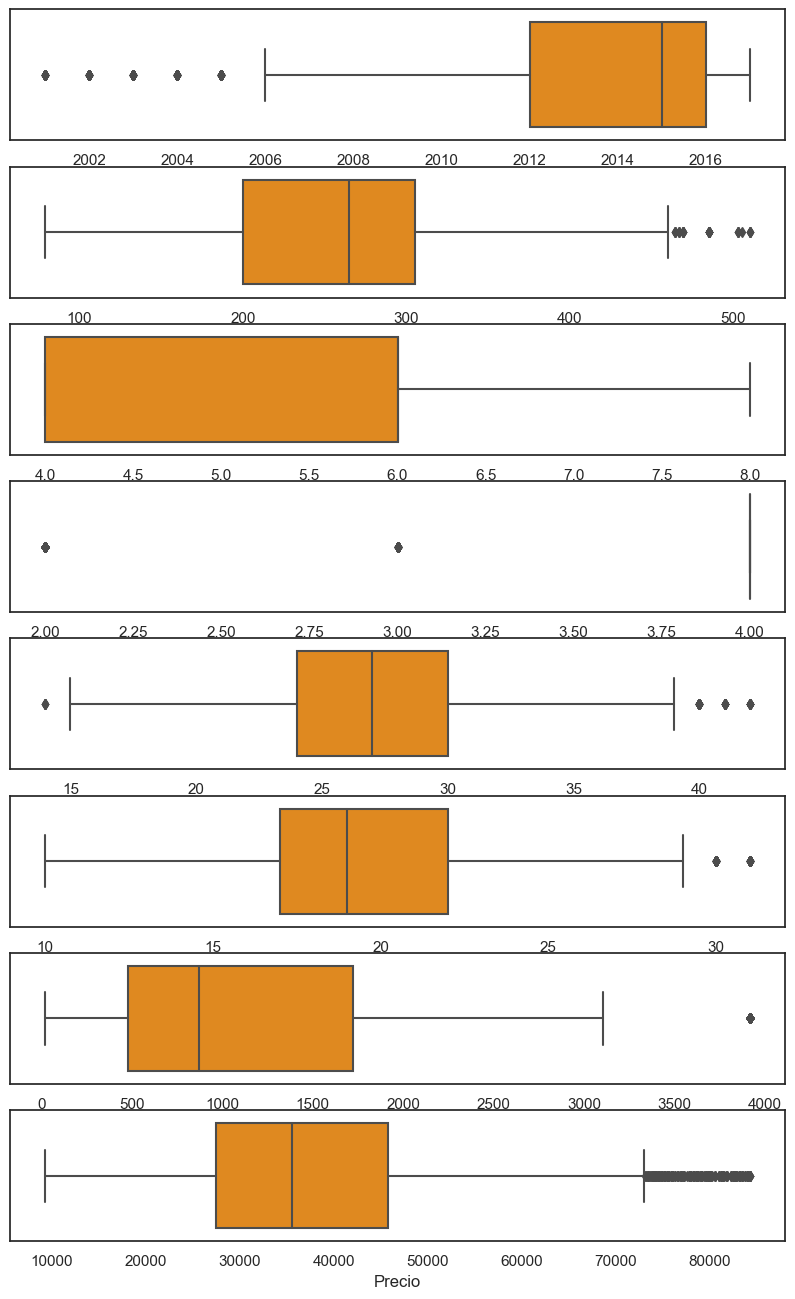

In [36]:
columns_with_outliers = ['Año','CV','Cilindros','Puertas','Consumo Carretera','Consumo Ciudad','Popularidad', 'Precio']
print(f'Número de filas (con valores atípicos): {dataFrame.shape[0]}')
print('Eliminando valores atípicos')
Q1 = dataFrame[columns_with_outliers].quantile(0.25)
Q3 = dataFrame[columns_with_outliers].quantile(0.75)
IQR = Q3 - Q1
dataFrame_transformed = dataFrame[~((dataFrame < (Q1 - 1.5 * IQR)) | (dataFrame > (Q3 + 1.5 * IQR))).any(axis=1)]
print(f'Número de filas (sin valores atípicos): {dataFrame_transformed.shape[0]}')
numeric_types, categoric_types = analyze_dataFrame(dataFrame_transformed)
print()
print('Datos Cuantitativos:')
print(numeric_types.to_string(index=False))
print()
fig, axs = pyplot.subplots(figsize=(10,16), nrows=8)
seaborn.boxplot(x=dataFrame_transformed['Año'], ax=axs[0], color='darkorange')
seaborn.boxplot(x=dataFrame_transformed['CV'], ax=axs[1], color='darkorange')
seaborn.boxplot(x=dataFrame_transformed['Cilindros'], ax=axs[2], color='darkorange')
seaborn.boxplot(x=dataFrame_transformed['Puertas'], ax=axs[3], color='darkorange')
seaborn.boxplot(x=dataFrame_transformed['Consumo Carretera'], ax=axs[4], color='darkorange')
seaborn.boxplot(x=dataFrame_transformed['Consumo Ciudad'], ax=axs[5], color='darkorange')
seaborn.boxplot(x=dataFrame_transformed['Popularidad'], ax=axs[6], color='darkorange')
seaborn.boxplot(x=dataFrame_transformed['Precio'], ax=axs[7], color='darkorange');

## 4.3. Construir

Se incluye un ejemplo de normalización de la variable 'Popularidad'.

In [27]:
print('Variable Popularidad sin normalizar')
print(dataFrame_transformed['Popularidad'])

Variable Popularidad sin normalizar
0        3916
1        3916
2        3916
3        3916
4        3916
         ... 
11909     204
11910     204
11911     204
11912     204
11913      61
Name: Popularidad, Length: 5622, dtype: int64


In [28]:
minMaxScaler = MinMaxScaler()
dataFrame_transformed[['Popularidad']] = minMaxScaler.fit_transform(dataFrame_transformed[['Popularidad']])

print('Variable Popularidad normalizada')
print(dataFrame_transformed['Popularidad'])

Variable Popularidad normalizada
0       1.00
1       1.00
2       1.00
3       1.00
4       1.00
        ... 
11909   0.05
11910   0.05
11911   0.05
11912   0.05
11913   0.01
Name: Popularidad, Length: 5622, dtype: float64


/var/folders/cf/7nzhdlvs5nl0_zh6ky9hz9vc0000gn/T/ipykernel_2429/2170085452.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame_transformed[['Popularidad']] = minMaxScaler.fit_transform(dataFrame_transformed[['Popularidad']])


## 4.4. Formatear

Transformamos las variables categóricas en numéricas para que estos datos no sean malinterpretados por los algoritmos de aprendizaje automático que se presentarán a continuación.

In [41]:
from sklearn.preprocessing import OneHotEncoder

for i in categoric_types.index:
    column = categoric_types['Nombre'][i] 
    print(column)
    ohe = OneHotEncoder()
    transformed = ohe.fit_transform(dataFrame_transformed[[column]])
    dataFrame_transformed[column] = transformed.toarray();

dataFrame_transformed.head()

Marca
Modelo
Combustible
Transmisión
Tracción
Mercado
Tamaño
Estilo


/var/folders/cf/7nzhdlvs5nl0_zh6ky9hz9vc0000gn/T/ipykernel_2429/2435917942.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame_transformed[column] = transformed.toarray();
/var/folders/cf/7nzhdlvs5nl0_zh6ky9hz9vc0000gn/T/ipykernel_2429/2435917942.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame_transformed[column] = transformed.toarray();
/var/folders/cf/7nzhdlvs5nl0_zh6ky9hz9vc0000gn/T/ipykernel_2429/2435917942.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,Marca,Modelo,Año,Combustible,CV,Cilindros,Transmisión,Tracción,Puertas,Mercado,Tamaño,Estilo,Consumo Carretera,Consumo Ciudad,Popularidad,Precio
0,0.00,0.00,2011,0.00,335.00,6.00,0.00,0.00,2,0.00,1.00,0.00,26.00,19.00,3916,46135.00
1,0.00,1.00,2011,0.00,300.00,6.00,0.00,0.00,2,0.00,1.00,0.00,28.00,19.00,3916,40650.00
2,0.00,1.00,2011,0.00,300.00,6.00,0.00,0.00,2,0.00,1.00,0.00,28.00,20.00,3916,36350.00
3,0.00,1.00,2011,0.00,230.00,6.00,0.00,0.00,2,0.00,1.00,0.00,28.00,18.00,3916,29450.00
4,0.00,1.00,2011,0.00,230.00,6.00,0.00,0.00,2,0.00,1.00,0.00,28.00,18.00,3916,34500.00


Comprobamos posibles correlaciones:

/var/folders/cf/7nzhdlvs5nl0_zh6ky9hz9vc0000gn/T/ipykernel_2429/3389916241.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataFrame_transformed.corr()


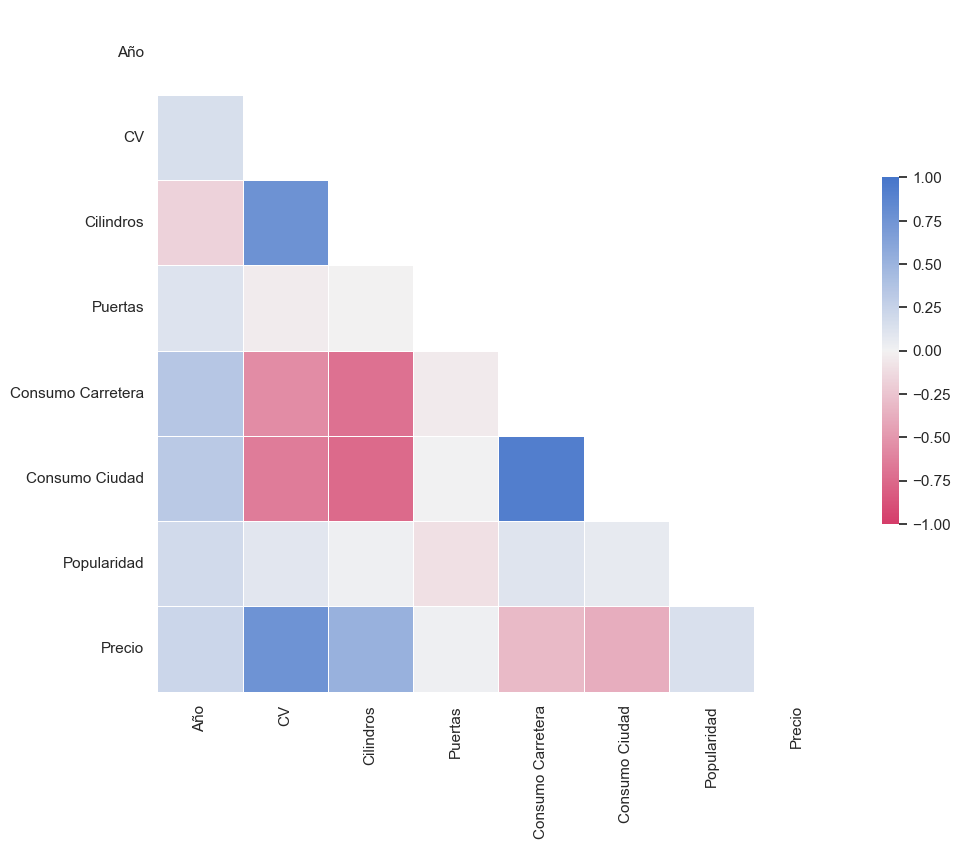

In [37]:
corr = dataFrame_transformed.corr()
mask = numpy.triu(numpy.ones_like(corr, dtype=bool))
f, ax = pyplot.subplots(figsize=(11, 9))
cmap = seaborn.diverging_palette(0, 255, as_cmap=True)
seaborn.set_theme(style='white')
seaborn.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

La variable 'CV' es la que más correlacionada se encuentra con la variable objetivo 'Precio', seguida de la variable 'Cilindros', como ya se apuntó.

# 5. Desarrollo y evaluación del modelo

En tanto que estamos trabajando con un modelo de aprendizaje automático supervisado y se desea estimar una variable cuantitativa, nos encontramos ante un problema de regresión.

## 5.1. Regresión lineal simple

Comenzando por los algoritmos más sencillos, probaremos primero con una regresión lineal con la variable explicativa que presenta una correlación mayor ('CV').

Error cuadrático medio (MSE): 0.0146
Coeficiente de determinación (R2): 0.5971


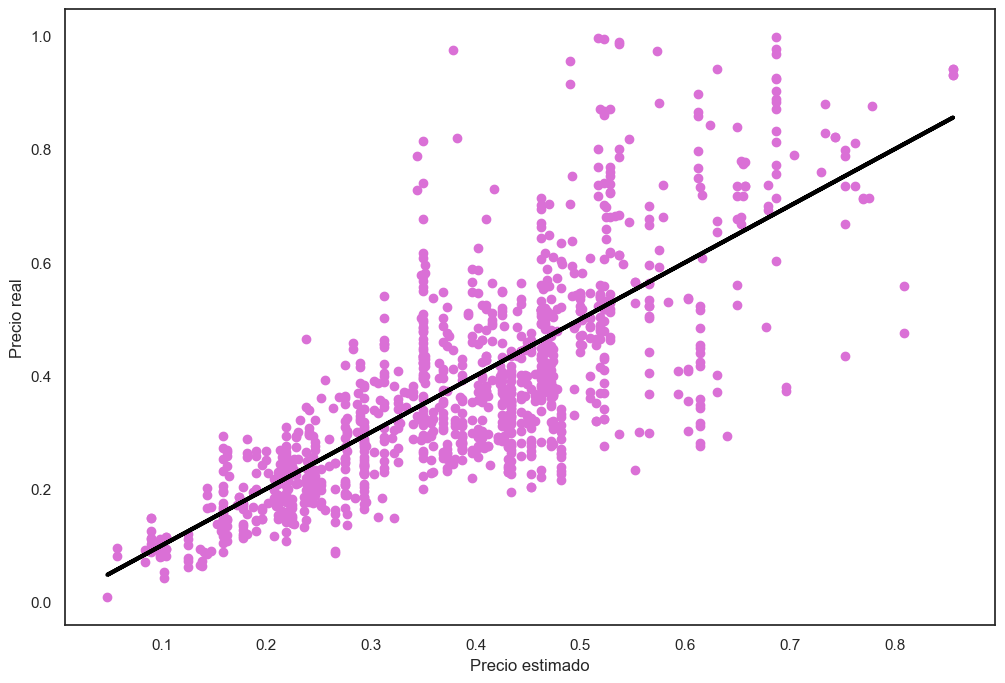

In [38]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

x_cols = ['CV']
y_cols = ['Precio']

# Normalizamos las dos variables para interpretar mejor los resultados
scaler = MinMaxScaler()
X = scaler.fit_transform(dataFrame_transformed[x_cols])
y = scaler.fit_transform(dataFrame_transformed[y_cols])

# Generamos el dataset de entrenamiento y el de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=47)

# Entrenamos el modelo
lg = linear_model.LinearRegression()
lg.fit(X_train, y_train)

# Evaluamos el modelo
y_pred = lg.predict(X_test)

print(f"Error cuadrático medio (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"Coeficiente de determinación (R2): {r2_score(y_test, y_pred):.4f}")

fig, ax = pyplot.subplots(figsize=(12,8))
pyplot.scatter(y_pred, y_test,  color='orchid')
pyplot.plot(y_pred, y_pred, color='black', linewidth=3)

pyplot.xlabel('Precio estimado')
pyplot.ylabel('Precio real')
pyplot.show()

## 5.2. Regresión lineal múltiple

Añadimos más variables a través de una regresión múltiple para comprobar si el modelo mejora.

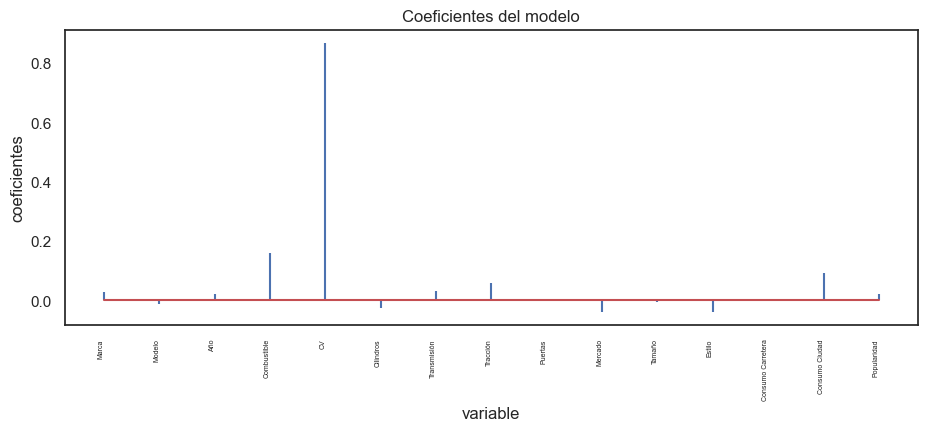

In [42]:
# Cogemos todas las variables explicativas 
X = dataFrame_transformed.drop(columns='Precio')
y = dataFrame_transformed['Precio']

# Normalizamos las variables para interpretar mejor el resultado
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(X.values)
X = pandas.DataFrame(scaled_features, index=X.index, columns=X.columns)
y = scaler.fit_transform(dataFrame_transformed[['Precio']])


X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.7,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

# Creación y entrenamiento del modelo
modelo = linear_model.LinearRegression()
modelo.fit(X = X_train, y = y_train)

# Coeficientes del modelo
dataFrame_coeficientes = pandas.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = pyplot.subplots(figsize=(11, 3.84))
ax.stem(dataFrame_coeficientes.predictor, dataFrame_coeficientes.coef, markerfmt=' ')
pyplot.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

Como se puede observar, ninguna otra variable está lo suficientemente correlada para considerar su contribución al modelo. No obstante, comprobamos si su inclusión mejora el modelo anterior:


Error cuadrático medio (MSE): 0.0146
Raíz del Error cuadrático medio (MSE): 0.1207
Coeficiente de determinación (R2): 0.6350


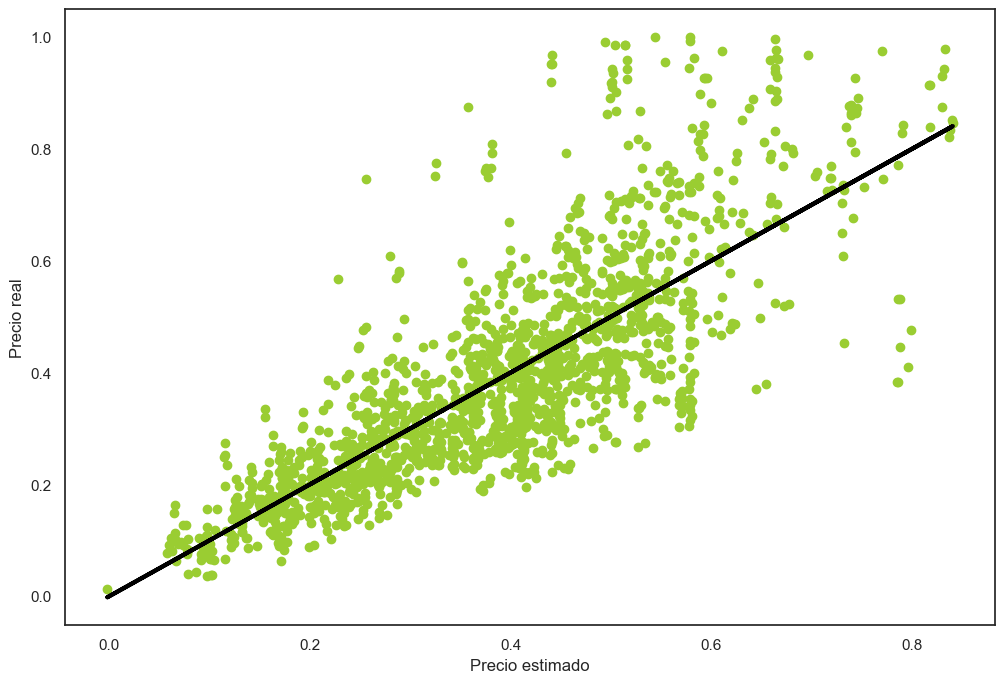

In [43]:
# Evaluamos el modelo
y_pred = modelo.predict(X=X_test)
y_pred = y_pred.flatten()
y_pred[:10]

print('')
print(f'Error cuadrático medio (MSE): {mean_squared_error(y_test, y_pred):.4f}')
print(f'Raíz del Error cuadrático medio (MSE): {mean_squared_error(y_test, y_pred,squared=False):.4f}')
print(f'Coeficiente de determinación (R2): {r2_score(y_test, y_pred):.4f}')

fig, ax = pyplot.subplots(figsize=(12,8))
pyplot.scatter(y_pred, y_test,  color='yellowgreen')
pyplot.plot(y_pred, y_pred, color='black', linewidth=3)

pyplot.xlabel('Precio estimado')
pyplot.ylabel('Precio real')
pyplot.show()

Los resultados han mejorado, si bien el valor del coeficiente de determinación es moderado.

## 5.3. Regularización Ridge

A continuación, vamos a utilizar las regularizaciones Ridge y Lasso para ver si el modelo se comporta mejor.

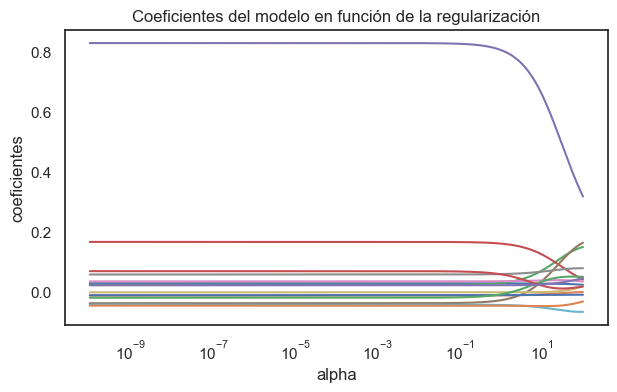

In [44]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# Por defecto RidgeCV utiliza el mean squared error
modelo = linear_model.RidgeCV(
            alphas          = numpy.logspace(-10, 2, 200),
            fit_intercept   = True,
            store_cv_values = True
         )

_ = modelo.fit(X = X_train, y = y_train)

# Evolución de los coeficientes en función de alpha
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = linear_model.Ridge(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = pyplot.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
pyplot.axis('tight')
pyplot.show()

Apenas tiene efecto la regularización sobre los coeficientes de la regresión lineal, descartando su utilización.

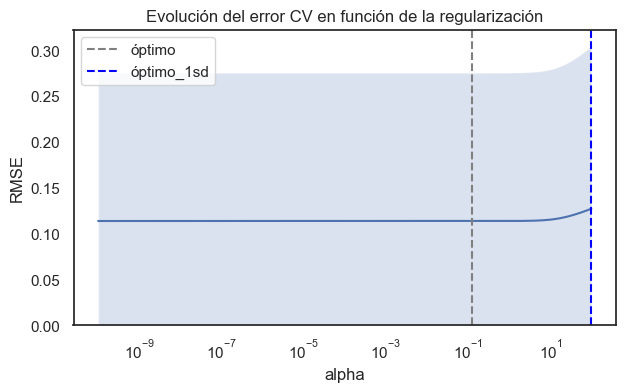

In [45]:
# Evolución del error en función de alpha

# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene dimensiones (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = numpy.sqrt(mse_cv)
rmse_sd = numpy.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = numpy.min(rmse_cv)
sd_min_rmse  = rmse_sd[numpy.argmin(rmse_cv)]
min_rsme_1sd = numpy.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[numpy.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = pyplot.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
pyplot.legend();

In [46]:
# Mejor valor alpha encontrado
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 0.1275051240713013


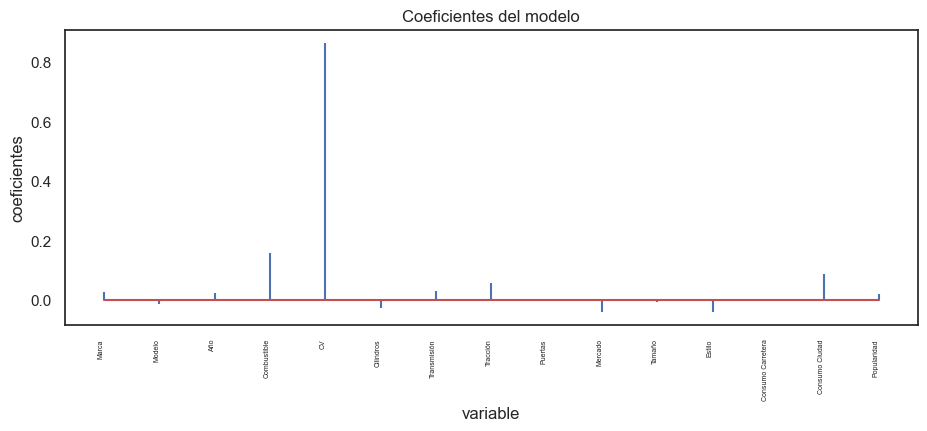

In [47]:
# Coeficientes del modelo
df_coeficientes = pandas.DataFrame(
                        {'predictor': X_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = pyplot.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
pyplot.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [48]:
# Predicciones test
y_pred = modelo.predict(X=X_test)
y_pred = y_pred.flatten()
y_pred[:10]

print("")
print(f"Error cuadrático medio (MSE): {mean_squared_error(y_test, y_pred):.4f}")
print(f"Raíz del Error cuadrático medio (MSE): {mean_squared_error(y_test, y_pred,squared=False):.4f}")
print(f"Coeficiente de determinación (R2): {r2_score(y_test, y_pred):.4f}")


Error cuadrático medio (MSE): 0.0146
Raíz del Error cuadrático medio (MSE): 0.1207
Coeficiente de determinación (R2): 0.6350


## 5.4. Regularización Lasso

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


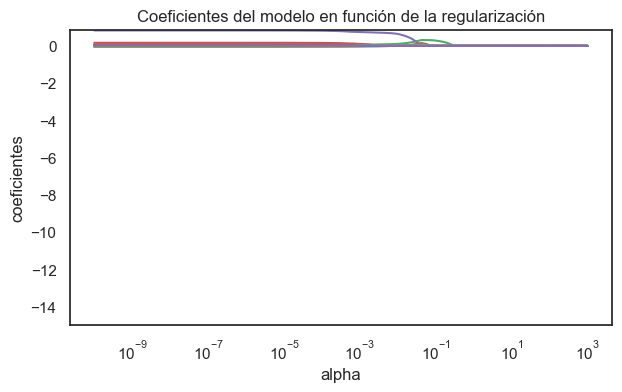

In [49]:
# Creación y entrenamiento del modelo (con búsqueda por CV del valor óptimo alpha)
# Por defecto LassoCV utiliza el mean squared error
modelo = linear_model.LassoCV(
            alphas          = numpy.logspace(-10, 3, 200),
            cv              = 10
         )
_ = modelo.fit(X = X_train, y = y_train)

# Evolución de los coeficientes en función de alpha
alphas = modelo.alphas_
coefs = []

for alpha in alphas:
    modelo_temp = linear_model.Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = pyplot.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');

Del mismo modo, tampoco se consigue ningún tipo de mejora y se descarta.

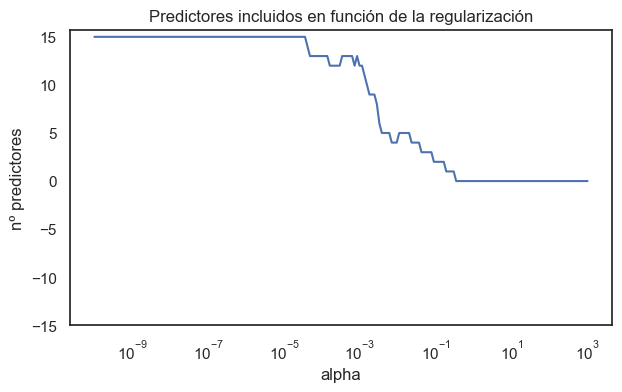

In [50]:
# Número de predictores incluidos (coeficiente !=0) en función de alpha
alphas = modelo.alphas_
n_predictores = []

for alpha in alphas:
    modelo_temp = linear_model.Lasso(alpha=alpha, fit_intercept=False)
    modelo_temp.fit(X_train, y_train)
    coef_no_cero = numpy.sum(modelo_temp.coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = pyplot.subplots(figsize=(7, 3.84))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-15,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº predictores')
ax.set_title('Predictores incluidos en función de la regularización');

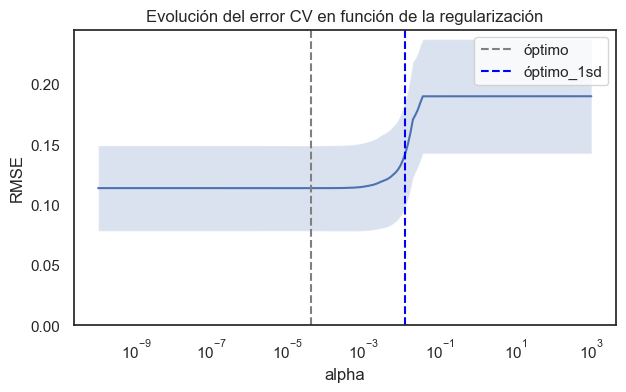

In [51]:
# Evolución del error en función de alpha

# modelo.mse_path_ almacena el mse de cv para cada valor de alpha. Tiene dimensiones (n_alphas, n_folds)
mse_cv = modelo.mse_path_.mean(axis=1)
mse_sd = modelo.mse_path_.std(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = numpy.sqrt(mse_cv)
rmse_sd = numpy.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = numpy.min(rmse_cv)
sd_min_rmse  = rmse_sd[numpy.argmin(rmse_cv)]
min_rsme_1sd = numpy.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[numpy.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

# Gráfico del error +- 1 desviación estándar
fig, ax = pyplot.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas_, rmse_cv)
ax.fill_between(
    modelo.alphas_,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = 'gray',
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = 'blue',
    linestyle = '--',
    label     = 'óptimo_1sd'
)

ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
pyplot.legend();

In [52]:
# Mejor valor alpha encontrado
print(f'Mejor valor de alpha encontrado: {modelo.alpha_}')

Mejor valor de alpha encontrado: 4.150404757850481e-05


In [53]:
# Mejor valor alpha encontrado + 1sd
min_rmse     = numpy.min(rmse_cv)
sd_min_rmse  = rmse_sd[numpy.argmin(rmse_cv)]
min_rsme_1sd = numpy.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas_[numpy.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas_[rmse_cv == min_rsme_1sd]

print(f'Mejor valor de alpha encontrado + 1 desviación estándar: {optimo_1sd}')

Mejor valor de alpha encontrado + 1 desviación estándar: [0.01260383]


In [54]:
# Coeficientes del modelo
df_coeficientes = pandas.DataFrame(
    {'predictor': X_train.columns,
    'coef': modelo.coef_.flatten()}
    )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

,predictor,coef
0,Marca,0.03
2,Año,0.02
3,Combustible,0.16
4,CV,0.86
5,Cilindros,-0.02
6,Transmisión,0.03
7,Tracción,0.06
8,Puertas,0.01
9,Mercado,-0.04
10,Tamaño,-0.00


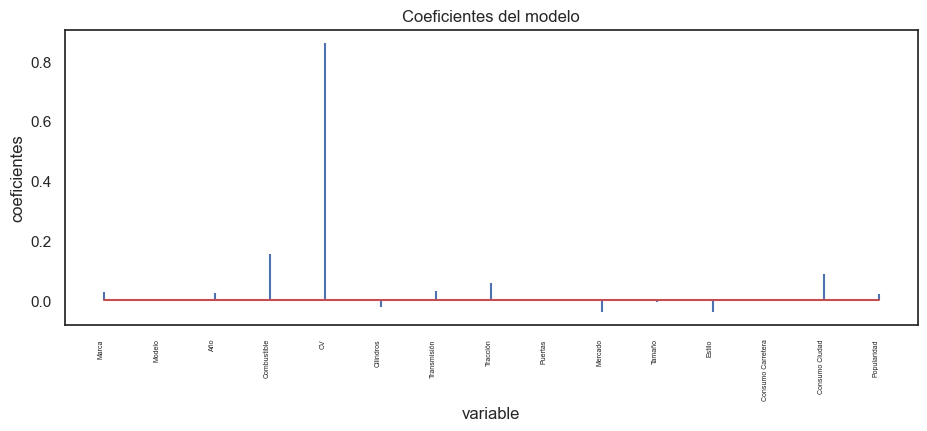

In [55]:
fig, ax = pyplot.subplots(figsize=(11, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
pyplot.xticks(rotation=90, ha='right', size=5)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [56]:
# Predicciones test
predicciones = modelo.predict(X=X_test)
predicciones = predicciones.flatten()
predicciones[:10]

# Error de test del modelo 
rmse_lasso = mean_squared_error(
                y_true  = y_test,
                y_pred  = predicciones,
                squared = False
             )

print("")
print(f"El error (rmse) de test es: {rmse_lasso}")


El error (rmse) de test es: 0.12067965346629171


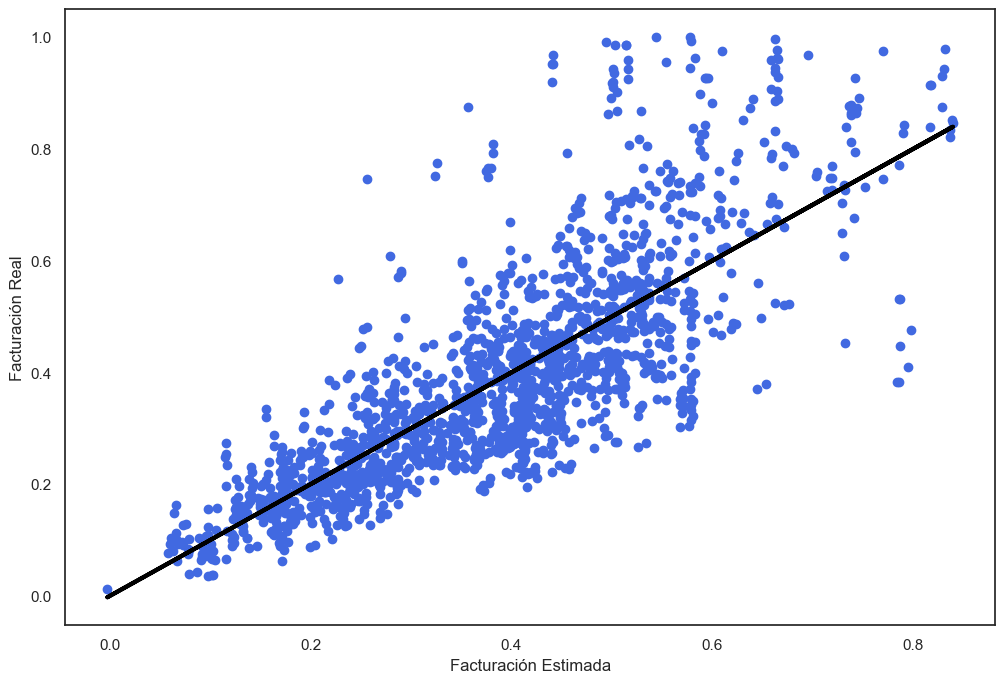

In [57]:
fig, ax = pyplot.subplots(figsize=(12,8))
pyplot.scatter(y_pred, y_test,  color='royalblue')
pyplot.plot(y_pred, y_pred, color='black', linewidth=3)

pyplot.xlabel('Facturación Estimada')
pyplot.ylabel('Facturación Real')
pyplot.show()